# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [93]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
raw_df = pd.read_csv('vngag/vngag.vn.csv')


In [96]:
post_df_full = raw_df
post_df_full.head(5)

post_id                                               text  \
0  739790934853318                       Ma ni phét :)))\n#VnGAGvideo   
1  738959674936444               Vãi nồi cái style :))))\n#VnGAGvideo   
2  738655521633526  Cứ như ngoài quán net 🙂\n#CLBSROVTC #ConDuongT...   
3  738116678354077  1 người lên công ty ngủ còn những người khác ở...   
4  737776435054768  Cuộc gọi của shipper Mua sắm VnShop urgent hơn...   

                                           post_text shared_text  \
0                       Ma ni phét :)))\n#VnGAGvideo         NaN   
1               Vãi nồi cái style :))))\n#VnGAGvideo         NaN   
2  Cứ như ngoài quán net 🙂\n#CLBSROVTC #ConDuongT...         NaN   
3  1 người lên công ty ngủ còn những người khác ở...         NaN   
4  Cuộc gọi của shipper Mua sắm VnShop urgent hơn...         NaN   

   original_text                 time   timestamp  \
0            NaN  2023-11-26 11:30:49  1700973049   
1            NaN  2023-11-25 12:16:29  1700889389   
2            NaN  2023-11-24 11:00:56  1700798456   
3            NaN  2023-11-23 11:03:27  1700712207   
4            NaN  2023-11-22 20:06:36  1700658396   

                                               image  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  https://scontent.fhan14-3.fna.fbcdn.net/v/t39....   
4                                                NaN   

                                    image_lowquality  \
0  https://scontent.fhan14-3.fna.fbcdn.net/v/t15....   
1  https://scontent.fhan14-2.fna.fbcdn.net/v/t15....   
2  https://scontent.fhan14-1.fna.fbcdn.net/v/t15....   
3  https://scontent.fhan14-3.fna.fbcdn.net/v/t39....   
4  https://scontent.fhan14-4.fna.fbcdn.net/v/t39....   

                                              images  ...  \
0                                                 []  ...   
1                                                 []  ...   
2                                                 []  ...   
3  ['https://scontent.fhan14-3.fna.fbcdn.net/v/t3...  ...   
4                                                 []  ...   

                                           w3_fb_url  \
0  https://www.facebook.com/vngag.vn/posts/739790...   
1  https://www.facebook.com/vngag.vn/posts/738959...   
2  https://www.facebook.com/vngag.vn/posts/738655...   
3  https://www.facebook.com/vngag.vn/posts/738116...   
4  https://www.facebook.com/vngag.vn/posts/737776...   

                                           reactions reaction_count with  \
0  {'thích': 3482, 'yêu thích': 77, 'haha': 4303,...           7914  NaN   
1  {'thích': 9337, 'yêu thích': 155, 'haha': 2055...          32088  NaN   
2  {'thích': 3296, 'yêu thích': 26, 'haha': 2706,...           6062  NaN   
3  {'thích': 3905, 'yêu thích': 31, 'haha': 4302,...           8315  NaN   
4         {'thích': 1023, 'yêu thích': 1, 'haha': 7}           1031  NaN   

           page_id  sharers      image_id            image_ids  was_live  \
0  325481744576385      NaN           NaN                   []     False   
1  325481744576385      NaN           NaN                   []     False   
2  325481744576385      NaN           NaN                   []     False   
3  325481744576385      NaN  7.381131e+14  ['738113118354433']     False   
4  325481744576385      NaN  7.377807e+14  ['737780688387676']     False   

                 fetched_time  
0  2023-11-27 10:50:14.410796  
1  2023-11-27 10:50:39.507941  
2  2023-11-27 10:51:19.974832  
3  2023-11-27 10:51:43.105552  
4  2023-11-27 10:52:06.337980  

[5 rows x 51 columns]

In [97]:
post_df_full[['post_id','reactions']]

post_id                                          reactions
0   739790934853318  {'thích': 3482, 'yêu thích': 77, 'haha': 4303,...
1   738959674936444  {'thích': 9337, 'yêu thích': 155, 'haha': 2055...
2   738655521633526  {'thích': 3296, 'yêu thích': 26, 'haha': 2706,...
3   738116678354077  {'thích': 3905, 'yêu thích': 31, 'haha': 4302,...
4   737776435054768         {'thích': 1023, 'yêu thích': 1, 'haha': 7}
..              ...                                                ...
95  692661239566288  {'thích': 7471, 'yêu thích': 75, 'haha': 9264,...
96  692263506272728  {'thích': 1687, 'yêu thích': 8, 'haha': 1318, ...
97  692092739623138  {'thích': 14884, 'yêu thích': 191, 'haha': 178...
98  691700479662364  {'thích': 20285, 'yêu thích': 50, 'haha': 4724...
99  691526953013050  {'thích': 6003, 'yêu thích': 49, 'haha': 6724,...

[100 rows x 2 columns]

In [98]:
post_df_full = post_df_full[['time','timestamp' ,'reaction_count']]
post_df_full

time   timestamp  reaction_count
0   2023-11-26 11:30:49  1700973049            7914
1   2023-11-25 12:16:29  1700889389           32088
2   2023-11-24 11:00:56  1700798456            6062
3   2023-11-23 11:03:27  1700712207            8315
4   2023-11-22 20:06:36  1700658396            1031
..                  ...         ...             ...
95  2023-09-07 11:02:35  1694059355           16911
96  2023-09-06 18:06:56  1693998416            3047
97  2023-09-06 11:00:59  1693972859           33120
98  2023-09-05 17:32:36  1693909956           25116
99  2023-09-05 11:00:07  1693886407           12859

[100 rows x 3 columns]

In [99]:
date = []
for i in range(100):
    date.append(post_df_full['time'][i].split(" ")[0])
date.reverse()
time = []
for i in range(100):
    time.append(post_df_full['time'][i].split(" ")[1])
time.reverse()
date_time = {
    'date': list(date),
    'timex': list(time)
}
df = pd.DataFrame(date_time)
df.sort_values(by = 'timex',axis = 0, ascending = True).head(20)

date     timex
39  2023-10-05  10:59:44
42  2023-10-08  11:00:01
67  2023-10-28  11:00:04
59  2023-10-22  11:00:05
54  2023-10-18  11:00:05
36  2023-10-02  11:00:05
24  2023-09-21  11:00:06
0   2023-09-05  11:00:07
25  2023-09-22  11:00:07
33  2023-09-29  11:00:10
8   2023-09-09  11:00:14
32  2023-09-28  11:00:14
29  2023-09-25  11:00:14
75  2023-11-04  11:00:15
86  2023-11-14  11:00:16
64  2023-10-26  11:00:16
76  2023-11-05  11:00:17
58  2023-10-21  11:00:18
55  2023-10-19  11:00:18
9   2023-09-10  11:00:21

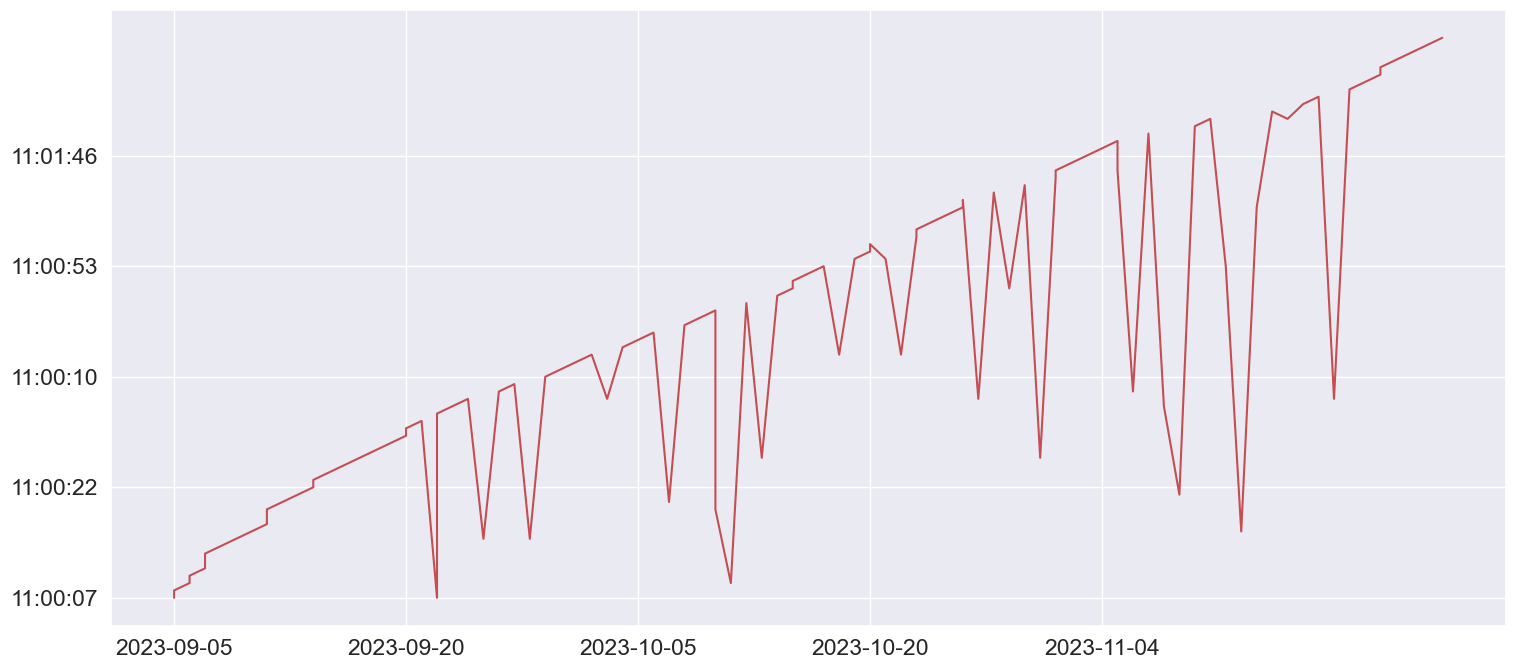

In [100]:
fig, ax = plt.subplots(figsize=(18, 8))
x1 = list(date)
y1 = list(time)
plt.plot(x1,y1,c = 'r')
ax.set_xticks(np.arange(0,15*5,15))
ax.set_yticks(np.arange(0,15*5,15))
plt.show()

In [101]:
xyz = pd.concat([df, post_df_full], axis=1).drop('time' , axis= 1)
xyz

date     timex   timestamp  reaction_count
0   2023-09-05  11:00:07  1700973049            7914
1   2023-09-05  17:32:36  1700889389           32088
2   2023-09-06  11:00:59  1700798456            6062
3   2023-09-06  18:06:56  1700712207            8315
4   2023-09-07  11:02:35  1700658396            1031
..         ...       ...         ...             ...
95  2023-11-22  20:06:36  1694059355           16911
96  2023-11-23  11:03:27  1693998416            3047
97  2023-11-24  11:00:56  1693972859           33120
98  2023-11-25  12:16:29  1693909956           25116
99  2023-11-26  11:30:49  1693886407           12859

[100 rows x 4 columns]

In [102]:
raw_df.describe()

post_id  original_text     timestamp  video_duration_seconds  \
count  1.000000e+02            0.0  1.000000e+02                     0.0   
mean   7.145539e+14            NaN  1.697240e+09                     NaN   
std    1.465136e+13            NaN  2.132797e+06                     NaN   
min    6.915270e+14            NaN  1.693886e+09                     NaN   
25%    7.014658e+14            NaN  1.695334e+09                     NaN   
50%    7.149983e+14            NaN  1.697299e+09                     NaN   
75%    7.269164e+14            NaN  1.699006e+09                     NaN   
max    7.397909e+14            NaN  1.700973e+09                     NaN   

       video_height      video_id  video_quality  video_size_MB  \
count           0.0  8.800000e+01            0.0            0.0   
mean            NaN  1.177876e+15            NaN            NaN   
std             NaN  9.639783e+14            NaN            NaN   
min             NaN  1.771492e+14            NaN            NaN   
25%             NaN  6.123179e+14            NaN            NaN   
50%             NaN  9.434418e+14            NaN            NaN   
75%             NaN  1.528050e+15            NaN            NaN   
max             NaN  6.630816e+15            NaN            NaN   

       video_watches  video_width  ...  shared_post_id  shared_time  \
count            0.0          0.0  ...             0.0          0.0   
mean             NaN          NaN  ...             NaN          NaN   
std              NaN          NaN  ...             NaN          NaN   
min              NaN          NaN  ...             NaN          NaN   
25%              NaN          NaN  ...             NaN          NaN   
50%              NaN          NaN  ...             NaN          NaN   
75%              NaN          NaN  ...             NaN          NaN   
max              NaN          NaN  ...             NaN          NaN   

       shared_user_id  shared_username  shared_post_url  reaction_count  with  \
count             0.0              0.0              0.0      100.000000   0.0   
mean              NaN              NaN              NaN    17839.370000   NaN   
std               NaN              NaN              NaN    12792.514474   NaN   
min               NaN              NaN              NaN     1031.000000   NaN   
25%               NaN              NaN              NaN     8338.250000   NaN   
50%               NaN              NaN              NaN    14549.000000   NaN   
75%               NaN              NaN              NaN    24106.250000   NaN   
max               NaN              NaN              NaN    75249.000000   NaN   

            page_id  sharers      image_id  
count  1.000000e+02      0.0  8.000000e+00  
mean   3.254817e+14      NaN  7.216960e+14  
std    7.537784e-01      NaN  1.384174e+13  
min    3.254817e+14      NaN  6.951598e+14  
25%    3.254817e+14      NaN  7.160216e+14  
50%    3.254817e+14      NaN  7.213282e+14  
75%    3.254817e+14      NaN  7.304595e+14  
max    3.254817e+14      NaN  7.381131e+14  

[8 rows x 26 columns]

In [103]:
post_df = post_df_full.dropna()
post_df.isnull().sum()

time              0
timestamp         0
reaction_count    0
dtype: int64

In [104]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      100 non-null    object 
 3   shared_text                    2 non-null      object 
 4   original_text                  0 non-null      float64
 5   time                           100 non-null    object 
 6   timestamp                      100 non-null    int64  
 7   image                          11 non-null     object 
 8   image_lowquality               100 non-null    object 
 9   images                         100 non-null    object 
 10  images_description             100 non-null    object 
 11  images_lowquality              100 non-null    object 
 12  images_lowquality_description  100 non-null    obje

In [105]:
post_df_full=post_df_full
post_df_full.head(100)

time   timestamp  reaction_count
0   2023-11-26 11:30:49  1700973049            7914
1   2023-11-25 12:16:29  1700889389           32088
2   2023-11-24 11:00:56  1700798456            6062
3   2023-11-23 11:03:27  1700712207            8315
4   2023-11-22 20:06:36  1700658396            1031
..                  ...         ...             ...
95  2023-09-07 11:02:35  1694059355           16911
96  2023-09-06 18:06:56  1693998416            3047
97  2023-09-06 11:00:59  1693972859           33120
98  2023-09-05 17:32:36  1693909956           25116
99  2023-09-05 11:00:07  1693886407           12859

[100 rows x 3 columns]

In [106]:
raw_df['reactions']

0     {'thích': 3482, 'yêu thích': 77, 'haha': 4303,...
1     {'thích': 9337, 'yêu thích': 155, 'haha': 2055...
2     {'thích': 3296, 'yêu thích': 26, 'haha': 2706,...
3     {'thích': 3905, 'yêu thích': 31, 'haha': 4302,...
4            {'thích': 1023, 'yêu thích': 1, 'haha': 7}
                            ...                        
95    {'thích': 7471, 'yêu thích': 75, 'haha': 9264,...
96    {'thích': 1687, 'yêu thích': 8, 'haha': 1318, ...
97    {'thích': 14884, 'yêu thích': 191, 'haha': 178...
98    {'thích': 20285, 'yêu thích': 50, 'haha': 4724...
99    {'thích': 6003, 'yêu thích': 49, 'haha': 6724,...
Name: reactions, Length: 100, dtype: object

In [107]:
dates=post_df_full['timestamp'].to_list()
y=post_df_full['reaction_count'].to_list()
dates.reverse()
y.reverse()
print(len(dates),len(y))
print(dates)
print(y)

100 100
[1693886407, 1693909956, 1693972859, 1693998416, 1694059355, 1694083022, 1694088002, 1694145773, 1694232014, 1694318421, 1694404957, 1694428317, 1694437200, 1694491247, 1694577627, 1694664022, 1694687466, 1694754692, 1694836874, 1694923232, 1695009741, 1695096188, 1695182434, 1695206494, 1695268806, 1695355207, 1695387606, 1695441655, 1695528026, 1695614414, 1695700844, 1695787396, 1695873614, 1695960010, 1696046461, 1696132843, 1696219205, 1696305626, 1696392057, 1696478384, 1696564825, 1696651247, 1696737601, 1696824416, 1696910539, 1696942800, 1696996859, 1697083412, 1697169632, 1697256041, 1697342454, 1697375902, 1697428911, 1697515253, 1697601605, 1697688018, 1697774423, 1697806962, 1697860818, 1697947205, 1698033846, 1698055590, 1698120064, 1698206553, 1698292816, 1698325202, 1698379226, 1698465604, 1698552054, 1698639921, 1698724832, 1698811269, 1698843607, 1698897635, 1698984106, 1699070415, 1699156817, 1699189207, 1699243244, 1699330795, 1699416055, 1699502427, 1699588

In [108]:
first_row = raw_df.iloc[1]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']


In [109]:
reactions 

{'thích': 9337,
 'yêu thích': 155,
 'haha': 20550,
 'wow': 18,
 'thương thương': 30,
 'buồn': 1992,
 'phẫn nộ': 6,
 'shares': 267,
 'comments': 1478}

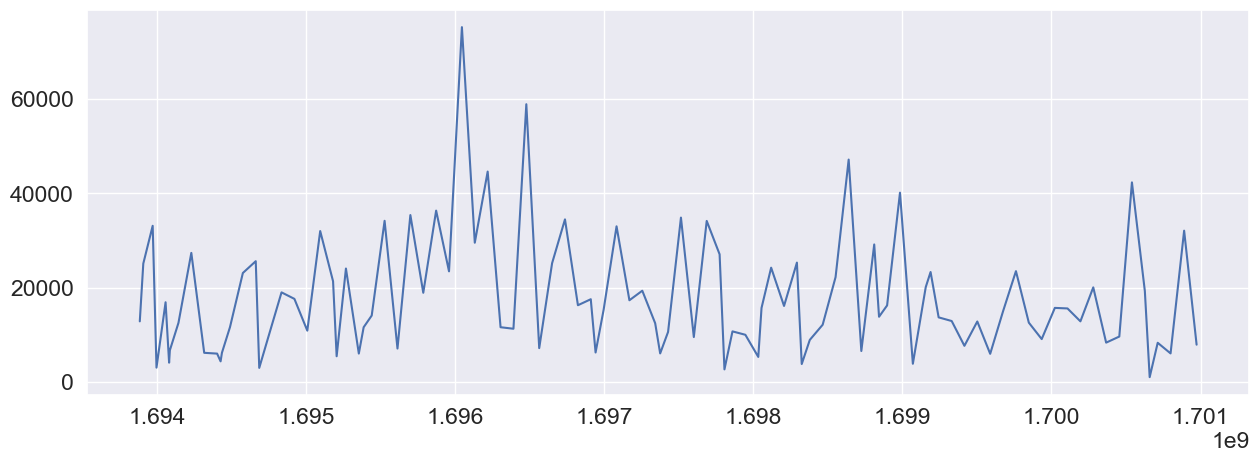

In [110]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.plot(dates,y)
plt.show()



In [111]:
raw_df['reactions'] = raw_df['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_reactions = raw_df['reactions'].apply(pd.Series )


In [112]:
post_df_full_with_reactions = pd.concat([raw_df, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

post_text    thích  yêu thích  \
0                        Ma ni phét :)))\n#VnGAGvideo   3482.0       77.0   
1                Vãi nồi cái style :))))\n#VnGAGvideo   9337.0      155.0   
2   Cứ như ngoài quán net 🙂\n#CLBSROVTC #ConDuongT...   3296.0       26.0   
3   1 người lên công ty ngủ còn những người khác ở...   3905.0       31.0   
4   Cuộc gọi của shipper Mua sắm VnShop urgent hơn...   1023.0        1.0   
..                                                ...      ...        ...   
95         Đùa k vui tý lào 😣\n#VnGAGvideo #Tú #LMinh   7471.0       75.0   
96  Công ty vào năm bao nhiêu đó trước Công nguyên...   1687.0        8.0   
97  Sơ hở cái là mang tiếng :D\n#VnGAGvideo #Tú #L...  14884.0      191.0   
98          Khoảng cách thế hệ ló thế :)\n#VnGAGvideo  20285.0       50.0   
99    Ảo tưởng bản thân :)))\n#VnGAGvideo #LMinh #Lim   6003.0       49.0   

       haha   wow    buồn  phẫn nộ  thương thương  shares  comments  \
0    4303.0   2.0    38.0      1.0           11.0      51       176   
1   20550.0  18.0  1992.0      6.0           30.0     267      1478   
2    2706.0   5.0    23.0      NaN            6.0       9        30   
3    4302.0   1.0    71.0      2.0            3.0       6        79   
4       7.0   NaN     NaN      NaN            NaN       0        24   
..      ...   ...     ...      ...            ...     ...       ...   
95   9264.0   7.0    83.0      NaN           11.0      44       152   
96   1318.0   2.0    28.0      NaN            4.0       6        65   
97  17879.0  19.0   107.0      3.0           37.0     139       302   
98   4724.0   2.0    46.0      2.0            7.0     197       294   
99   6724.0   5.0    72.0      NaN            6.0      32       103   

    reaction_count  
0             7914  
1            32088  
2             6062  
3             8315  
4             1031  
..             ...  
95           16911  
96            3047  
97           33120  
98           25116  
99           12859  

[100 rows x 11 columns]

In [113]:
for i in range(0, len(post_df_full_with_reactions['thích'].values), 1):
    if pd.isna(post_df_full_with_reactions['thích'].values[i]):
        post_df_full_with_reactions['thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['yêu thích'].values[i]):
        post_df_full_with_reactions['yêu thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['buồn'].values[i]):
        post_df_full_with_reactions['buồn'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['phẫn nộ'].values[i]):
        post_df_full_with_reactions['phẫn nộ'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['thương thương'].values[i]):
        post_df_full_with_reactions['thương thương'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['shares'].values[i]):
        post_df_full_with_reactions['shares'].values[i] = 0
    
    if pd.isna(post_df_full_with_reactions['comments'].values[i]):
        post_df_full_with_reactions['comments'].values[i] = 0

post_df_full_with_reactions[['post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

post_text    thích  yêu thích  \
0                        Ma ni phét :)))\n#VnGAGvideo   3482.0       77.0   
1                Vãi nồi cái style :))))\n#VnGAGvideo   9337.0      155.0   
2   Cứ như ngoài quán net 🙂\n#CLBSROVTC #ConDuongT...   3296.0       26.0   
3   1 người lên công ty ngủ còn những người khác ở...   3905.0       31.0   
4   Cuộc gọi của shipper Mua sắm VnShop urgent hơn...   1023.0        1.0   
..                                                ...      ...        ...   
95         Đùa k vui tý lào 😣\n#VnGAGvideo #Tú #LMinh   7471.0       75.0   
96  Công ty vào năm bao nhiêu đó trước Công nguyên...   1687.0        8.0   
97  Sơ hở cái là mang tiếng :D\n#VnGAGvideo #Tú #L...  14884.0      191.0   
98          Khoảng cách thế hệ ló thế :)\n#VnGAGvideo  20285.0       50.0   
99    Ảo tưởng bản thân :)))\n#VnGAGvideo #LMinh #Lim   6003.0       49.0   

       haha   wow    buồn  phẫn nộ  thương thương  shares  comments  \
0    4303.0   2.0    38.0      1.0           11.0      51       176   
1   20550.0  18.0  1992.0      6.0           30.0     267      1478   
2    2706.0   5.0    23.0      0.0            6.0       9        30   
3    4302.0   1.0    71.0      2.0            3.0       6        79   
4       7.0   0.0     0.0      0.0            0.0       0        24   
..      ...   ...     ...      ...            ...     ...       ...   
95   9264.0   7.0    83.0      0.0           11.0      44       152   
96   1318.0   2.0    28.0      0.0            4.0       6        65   
97  17879.0  19.0   107.0      3.0           37.0     139       302   
98   4724.0   2.0    46.0      2.0            7.0     197       294   
99   6724.0   5.0    72.0      0.0            6.0      32       103   

    reaction_count  
0             7914  
1            32088  
2             6062  
3             8315  
4             1031  
..             ...  
95           16911  
96            3047  
97           33120  
98           25116  
99           12859  

[100 rows x 11 columns]

In [114]:
date = []
for i in range(100):
    date.append(post_df_full['time'][i].split(" ")[0])
date_react = {
    'time_date': list(date),
    'total of reactions':list(post_df_full_with_reactions['reaction_count'])
}
df = pd.DataFrame(date_react)
display(df)

time_date  total of reactions
0   2023-11-26                7914
1   2023-11-25               32088
2   2023-11-24                6062
3   2023-11-23                8315
4   2023-11-22                1031
..         ...                 ...
95  2023-09-07               16911
96  2023-09-06                3047
97  2023-09-06               33120
98  2023-09-05               25116
99  2023-09-05               12859

[100 rows x 2 columns]

In [115]:
#tính tổng reaction theo tháng
#thêm các cột type of reaction để tính barplot
date_year = []
for i in range(100):
    date_year.append(date_react['time_date'][i].split("-")[0])
date_month = []
for i in range(100):
    date_month.append(date_react['time_date'][i].split("-")[1])
total = {
    'date': list(date_time['date']),
    'year': list(date_year),
    'month': list(date_month),
    'reaction_count': list(post_df_full_with_reactions['reaction_count'])
}
df1 = pd.DataFrame(total)
df1[['date', 'year','month','reaction_count']]


date  year month  reaction_count
0   2023-09-05  2023    11            7914
1   2023-09-05  2023    11           32088
2   2023-09-06  2023    11            6062
3   2023-09-06  2023    11            8315
4   2023-09-07  2023    11            1031
..         ...   ...   ...             ...
95  2023-11-22  2023    09           16911
96  2023-11-23  2023    09            3047
97  2023-11-24  2023    09           33120
98  2023-11-25  2023    09           25116
99  2023-11-26  2023    09           12859

[100 rows x 4 columns]

In [116]:
type_of_reaction = pd.concat([post_df_full_with_reactions, df1], axis=1)
type_of_reaction.drop('reaction_count', axis=1)
type_of_reaction[['date','post_id','post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

date          post_id  \
0   2023-09-05  739790934853318   
1   2023-09-05  738959674936444   
2   2023-09-06  738655521633526   
3   2023-09-06  738116678354077   
4   2023-09-07  737776435054768   
..         ...              ...   
95  2023-11-22  692661239566288   
96  2023-11-23  692263506272728   
97  2023-11-24  692092739623138   
98  2023-11-25  691700479662364   
99  2023-11-26  691526953013050   

                                            post_text    thích  yêu thích  \
0                        Ma ni phét :)))\n#VnGAGvideo   3482.0       77.0   
1                Vãi nồi cái style :))))\n#VnGAGvideo   9337.0      155.0   
2   Cứ như ngoài quán net 🙂\n#CLBSROVTC #ConDuongT...   3296.0       26.0   
3   1 người lên công ty ngủ còn những người khác ở...   3905.0       31.0   
4   Cuộc gọi của shipper Mua sắm VnShop urgent hơn...   1023.0        1.0   
..                                                ...      ...        ...   
95         Đùa k vui tý lào 😣\n#VnGAGvideo #Tú #LMinh   7471.0       75.0   
96  Công ty vào năm bao nhiêu đó trước Công nguyên...   1687.0        8.0   
97  Sơ hở cái là mang tiếng :D\n#VnGAGvideo #Tú #L...  14884.0      191.0   
98          Khoảng cách thế hệ ló thế :)\n#VnGAGvideo  20285.0       50.0   
99    Ảo tưởng bản thân :)))\n#VnGAGvideo #LMinh #Lim   6003.0       49.0   

       haha   wow    buồn  phẫn nộ  thương thương  shares  comments  \
0    4303.0   2.0    38.0      1.0           11.0      51       176   
1   20550.0  18.0  1992.0      6.0           30.0     267      1478   
2    2706.0   5.0    23.0      0.0            6.0       9        30   
3    4302.0   1.0    71.0      2.0            3.0       6        79   
4       7.0   0.0     0.0      0.0            0.0       0        24   
..      ...   ...     ...      ...            ...     ...       ...   
95   9264.0   7.0    83.0      0.0           11.0      44       152   
96   1318.0   2.0    28.0      0.0            4.0       6        65   
97  17879.0  19.0   107.0      3.0           37.0     139       302   
98   4724.0   2.0    46.0      2.0            7.0     197       294   
99   6724.0   5.0    72.0      0.0            6.0      32       103   

    reaction_count  reaction_count  
0             7914            7914  
1            32088           32088  
2             6062            6062  
3             8315            8315  
4             1031            1031  
..             ...             ...  
95           16911           16911  
96            3047            3047  
97           33120           33120  
98           25116           25116  
99           12859           12859  

[100 rows x 14 columns]

<Axes: >

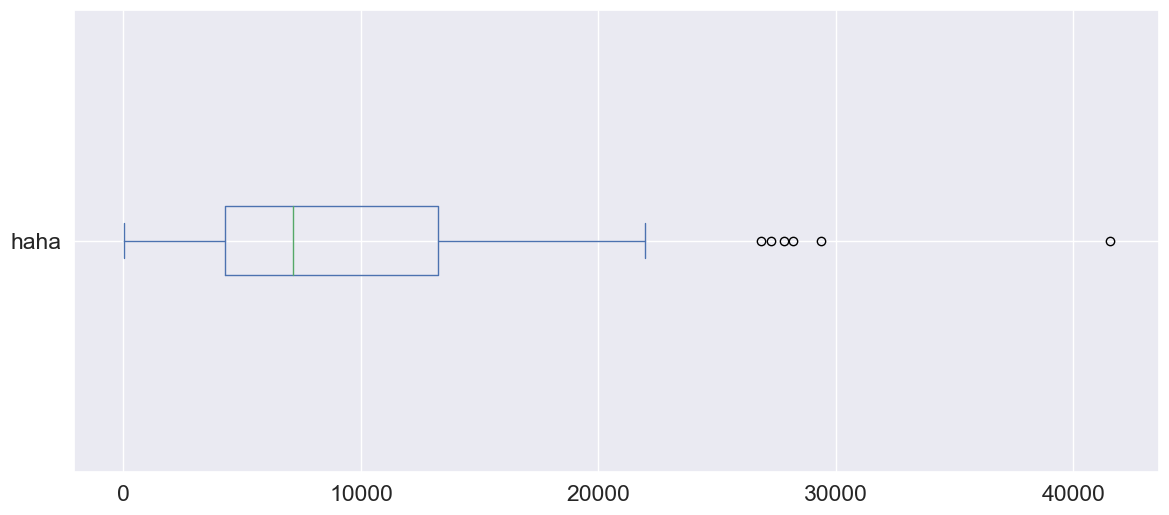

In [117]:
post_df_full_with_reactions['haha'].plot(kind='box', figsize =(14,6), vert = False)

<Axes: >

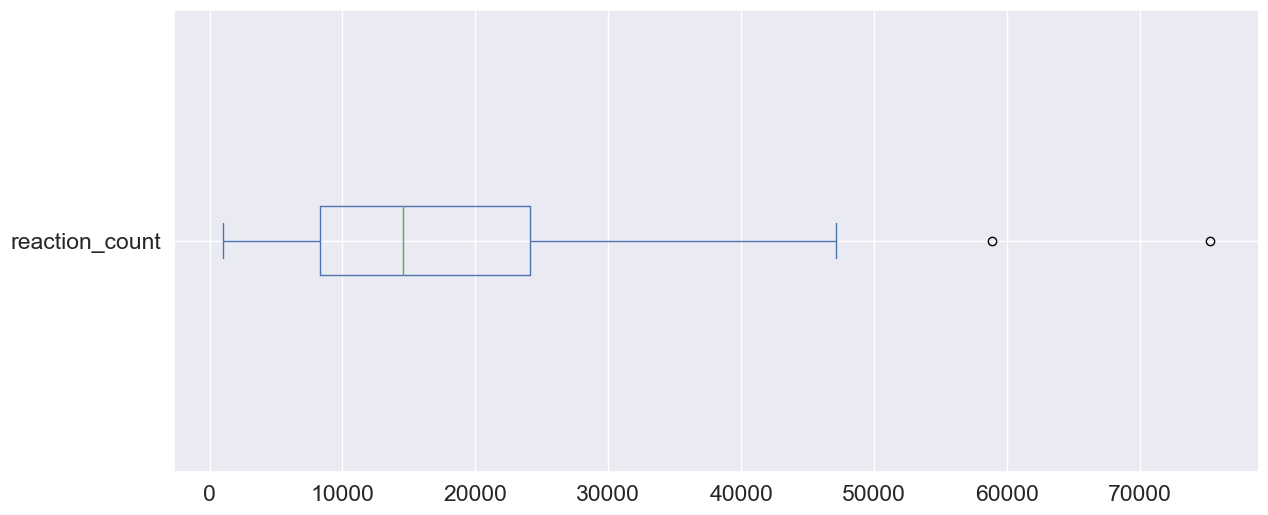

In [118]:
post_df_full_with_reactions['reaction_count'].plot(kind='box', figsize =(14,6), vert = False)

In [119]:
import datetime
time_with_reactionCount = post_df_full_with_reactions[['time','reaction_count']]
tgian_dangbai = []
for time in time_with_reactionCount['time']:
    s = time[11:]
    # print(s)
    s = datetime.time(int(s[:2]),int(s[3:5]),int(s[6:]))
    hour = s.hour
    minute = s.minute
    second = s.second
    if second > 30:
        minute+=1
        second=0
    else:
        second=0
    
    if minute==60:
        minute=0
        hour+=1
    t = datetime.time(hour, minute, second)
    tgian_dangbai.append(t)

In [120]:
khoang_tgian = ['0h00-0h30','0h30-1h00','1h00-1h30','1h30-2h00','2h00-2h30','2h30-3h00',
                '3h00-3h30','3h30-4h00','4h00-4h30','4h30-5h00','5h00-5h30','5h30-6h00',
                '6h00-6h30','6h30-7h00','7h00-7h30','7h30-8h00','8h00-8h30','8h30-9h00',
                '9h00-9h30','9h30-10h00','10h00-10h30','10h30-11h00','11h00-11h30','11h30-12h00',
                '12h00-12h30','12h30-13h00','13h00-13h30','13h30-14h00','14h00-14h30','14h30-15h00',
                '15h00-15h30','15h30-16h00','16h00-16h30','16h30-17h00','17h00-17h30','17h30-18h00',
                '18h00-18h30','18h30-19h00','19h00-19h30','19h30-20h00','20h00-20h30','20h30-21h00',
                '21h00-21h30','21h30-22h00','22h00-22h30','22h30-23h00','23h00-23h30','23h30-0h00']

tgian = {}
so_reaction = {}
df3 = []
for i in range(len(tgian_dangbai)):
    h = tgian_dangbai[i].hour
    m = tgian_dangbai[i].minute
    if m<30:
        if khoang_tgian[2*h] in tgian:
            tgian[khoang_tgian[2*h]]+=1
            so_reaction[khoang_tgian[2*h]]+=time_with_reactionCount['reaction_count'][i]
        else:
            tgian[khoang_tgian[2*h]]=1            
            so_reaction[khoang_tgian[2*h]]=time_with_reactionCount['reaction_count'][i]
    elif m>=30:
        if khoang_tgian[2*h+1] in tgian:
            tgian[khoang_tgian[2*h+1]]+=1
            so_reaction[khoang_tgian[2*h+1]]+=time_with_reactionCount['reaction_count'][i]
        else:
            tgian[khoang_tgian[2*h+1]]=1 
            so_reaction[khoang_tgian[2*h+1]]=time_with_reactionCount['reaction_count'][i]
for i in khoang_tgian:
    if i not in tgian:
        tgian[i]=0
        so_reaction[i]=0
df3.append(tgian)
df3.append(so_reaction)
df3 = pd.DataFrame(df3)
df3 = df3.loc[:, khoang_tgian]
df3

0h00-0h30  0h30-1h00  1h00-1h30  1h30-2h00  2h00-2h30  2h30-3h00  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   

   3h00-3h30  3h30-4h00  4h00-4h30  4h30-5h00  ...  19h00-19h30  19h30-20h00  \
0          0          0          0          0  ...            1            0   
1          0          0          0          0  ...         6720            0   

   20h00-20h30  20h30-21h00  21h00-21h30  21h30-22h00  22h00-22h30  \
0            9            0            0            0            0   
1        74793            0            0            0            0   

   22h30-23h00  23h00-23h30  23h30-0h00  
0            0            0           0  
1            0            0           0  

[2 rows x 48 columns]

In [121]:
thoi_gian = df3.loc[0,:][df3.loc[0,:]>0]

<Axes: xlabel='Thời gian', ylabel='Số bài đăng'>

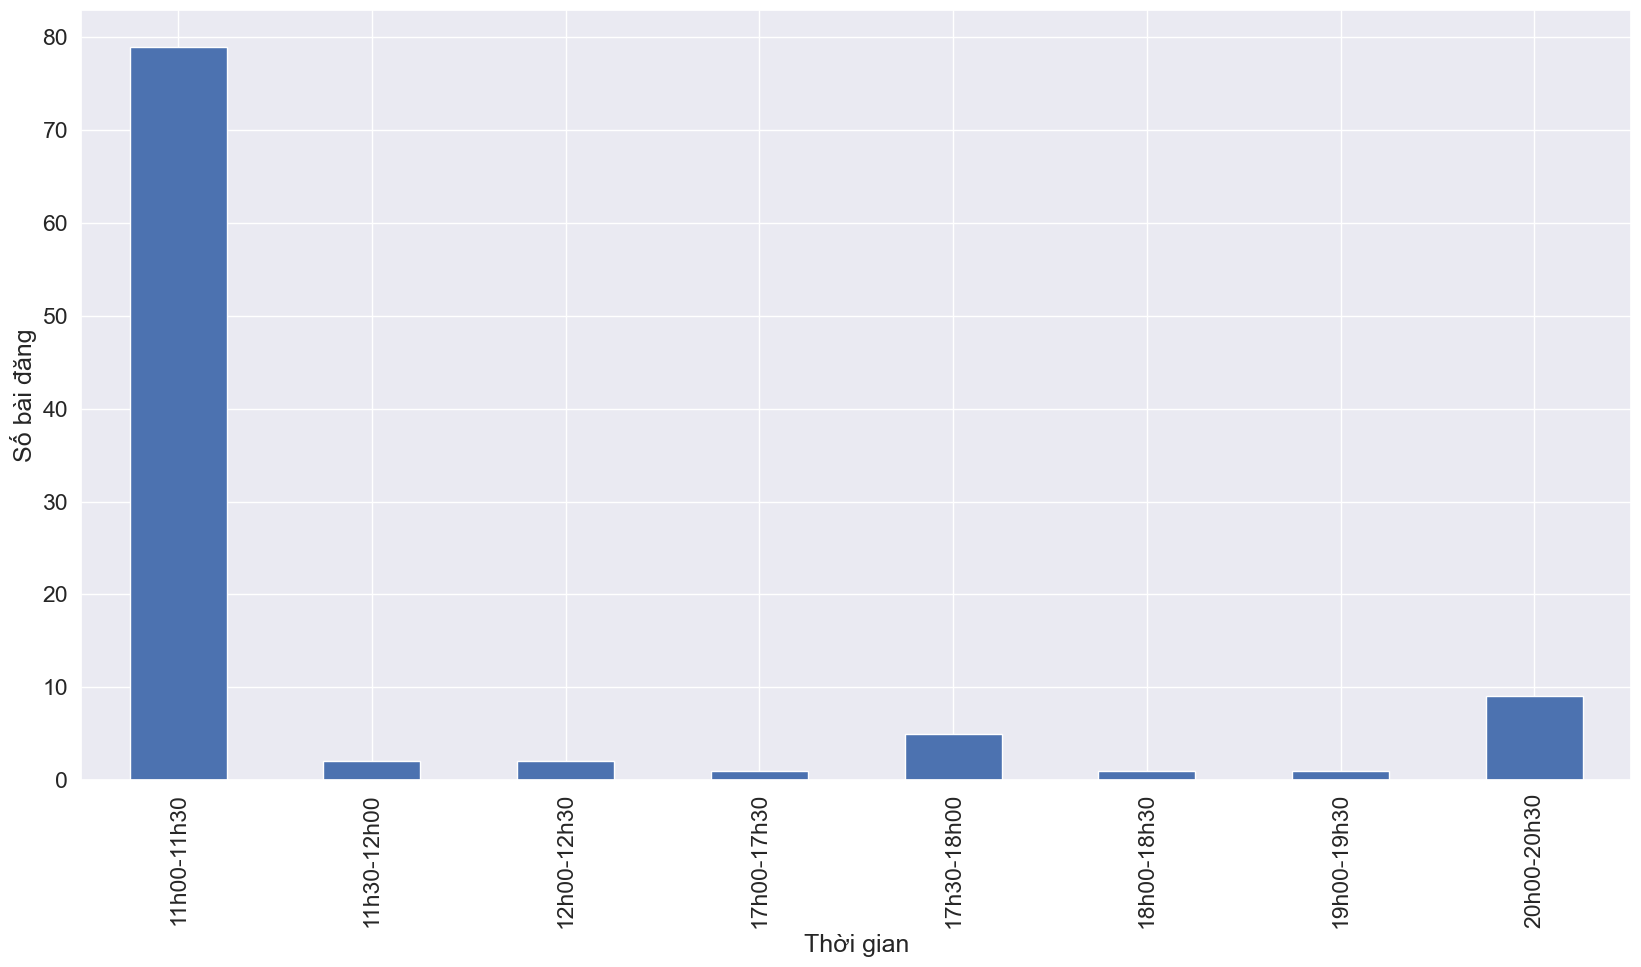

In [122]:
thoi_gian = df3.loc[0,:][df3.loc[0,:]>0]
thoi_gian.plot(kind='bar', figsize=(20,10), xlabel='Thời gian', ylabel='Số bài đăng')

In [123]:
k = max(thoi_gian)
b = thoi_gian[thoi_gian==k]
print('Thời gian hay đăng bài trong ngày:',b.index[::])
print('Số lần đăng bài trong khoảng thời gian này là:',k)

Thời gian hay đăng bài trong ngày: Index(['11h00-11h30'], dtype='object')
Số lần đăng bài trong khoảng thời gian này là: 79


<Axes: >

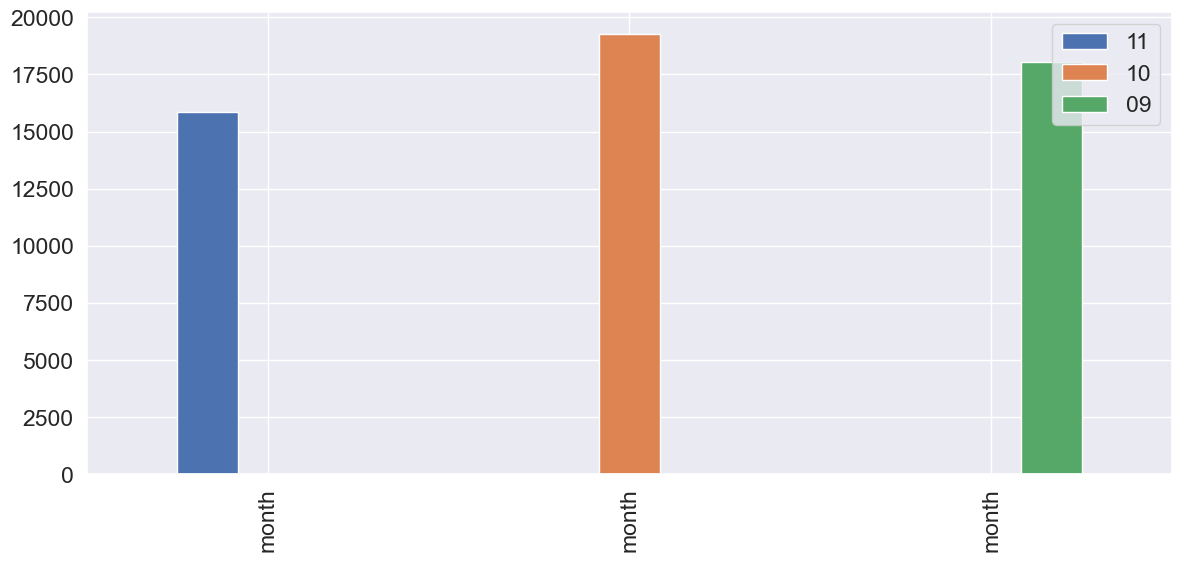

In [124]:
x1 = []
x1.append((df1['reaction_count'][df1['month'] == '11'].sum())/(df1['month'].loc[df1['month'] == '11'].value_counts()))
x1.append((df1['reaction_count'][df1['month'] == '10'].sum())/(df1['month'].loc[df1['month'] == '10'].value_counts()))
x1.append((df1['reaction_count'][df1['month'] == '09'].sum())/(df1['month'].loc[df1['month'] == '09'].value_counts()))
df2 = pd.DataFrame(x1)
df2.plot(kind = 'bar', figsize = (14,6))

<Axes: xlabel='reaction_count', ylabel='comments'>

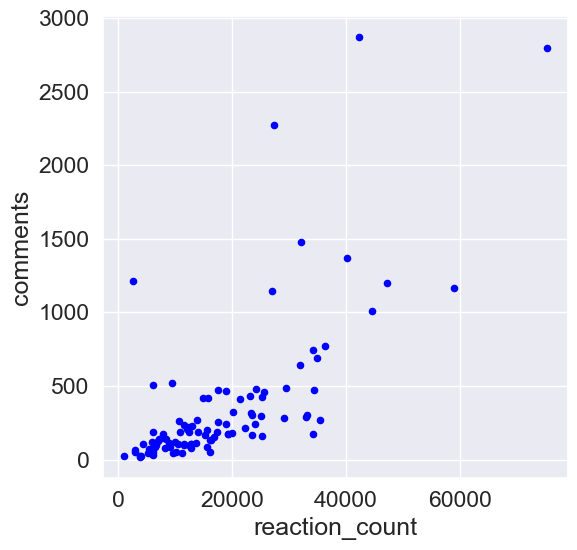

In [125]:
post_df_full_with_reactions.plot(kind='scatter', x='reaction_count', y='comments',color = 'blue' ,figsize=(6,6))

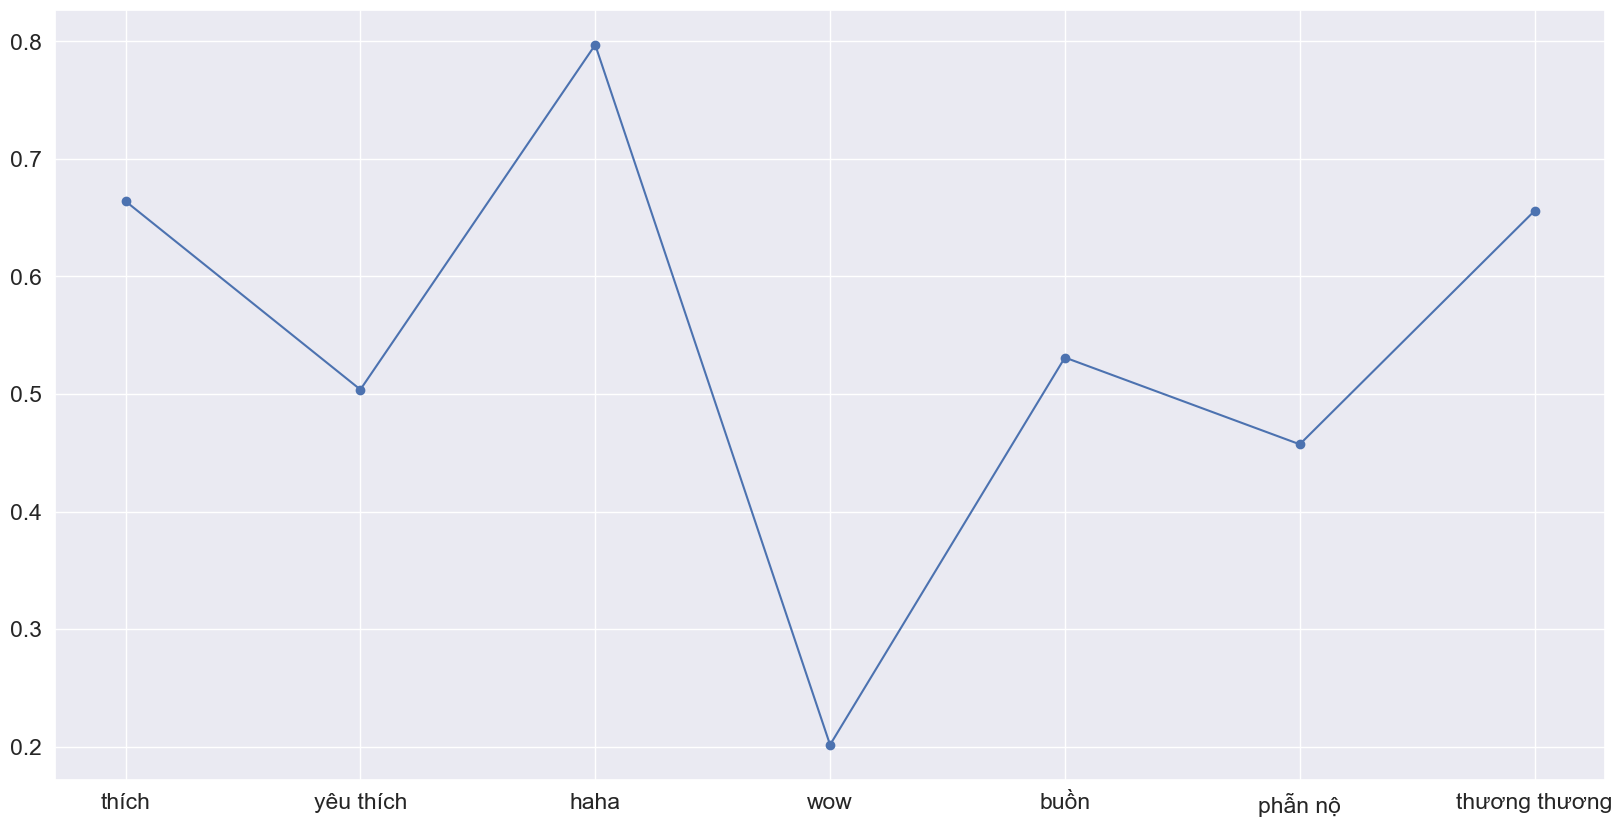

In [126]:
a = post_df_full_with_reactions[['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']].corrwith(post_df_full_with_reactions['shares'])
plt.subplots(figsize=(20,10))
plt.plot(a,marker= 'o')
plt.show()

In [127]:
print(post_df_full_with_reactions[['thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương']]
      .corrwith(post_df_full_with_reactions['shares']))


thích            0.664020
yêu thích        0.503803
haha             0.797028
wow              0.201694
buồn             0.531076
phẫn nộ          0.457258
thương thương    0.655839
dtype: float64


In [128]:
post_df_full_with_reactions[['post_text','time','thích','yêu thích','haha','wow',
                             'buồn','phẫn nộ','thương thương','comments',
                             'shares',
                             'reaction_count']].loc[post_df_full_with_reactions['reaction_count'] == post_df_full_with_reactions['reaction_count'].max()]


post_text                 time  \
65  Chơi bóng kiểu này hơi lạ :))))\n#VnGAGvideo #...  2023-09-30 11:01:01   

      thích  yêu thích     haha   wow   buồn  phẫn nộ  thương thương  \
65  32116.0      514.0  41532.0  57.0  940.0      9.0           81.0   

    comments  shares  reaction_count  
65      2796     897           75249

In [129]:
post_df_full_with_reactions[['post_text','time','comments','shares','reaction_count']].sort_values(by = 'reaction_count', ascending = True).head(5)

post_text                 time  \
4   Cuộc gọi của shipper Mua sắm VnShop urgent hơn...  2023-11-22 20:06:36   
42  Khi ai đó kêu tui chấm điểm cho chế độ zoom củ...  2023-10-20 20:02:42   
83         Đáng mặt đàn ông 😎\n#VnGAGvideo #Tú #LMinh  2023-09-14 17:31:06   
96  Công ty vào năm bao nhiêu đó trước Công nguyên...  2023-09-06 18:06:56   
34  Bạn vừa được thêm vào google calendar của cô ấ...  2023-10-26 20:00:02   

    comments  shares  reaction_count  
4         24       0            1031  
42      1211       4            2676  
83        51       6            2996  
96        65       6            3047  
34        25       2            3810

In [130]:
post_df_full_with_reactions.describe()

post_id  original_text     timestamp  video_duration_seconds  \
count  1.000000e+02            0.0  1.000000e+02                     0.0   
mean   7.145539e+14            NaN  1.697240e+09                     NaN   
std    1.465136e+13            NaN  2.132797e+06                     NaN   
min    6.915270e+14            NaN  1.693886e+09                     NaN   
25%    7.014658e+14            NaN  1.695334e+09                     NaN   
50%    7.149983e+14            NaN  1.697299e+09                     NaN   
75%    7.269164e+14            NaN  1.699006e+09                     NaN   
max    7.397909e+14            NaN  1.700973e+09                     NaN   

       video_height      video_id  video_quality  video_size_MB  \
count           0.0  8.800000e+01            0.0            0.0   
mean            NaN  1.177876e+15            NaN            NaN   
std             NaN  9.639783e+14            NaN            NaN   
min             NaN  1.771492e+14            NaN            NaN   
25%             NaN  6.123179e+14            NaN            NaN   
50%             NaN  9.434418e+14            NaN            NaN   
75%             NaN  1.528050e+15            NaN            NaN   
max             NaN  6.630816e+15            NaN            NaN   

       video_watches  video_width  ...       page_id  sharers      image_id  \
count            0.0          0.0  ...  1.000000e+02      0.0  8.000000e+00   
mean             NaN          NaN  ...  3.254817e+14      NaN  7.216960e+14   
std              NaN          NaN  ...  7.537784e-01      NaN  1.384174e+13   
min              NaN          NaN  ...  3.254817e+14      NaN  6.951598e+14   
25%              NaN          NaN  ...  3.254817e+14      NaN  7.160216e+14   
50%              NaN          NaN  ...  3.254817e+14      NaN  7.213282e+14   
75%              NaN          NaN  ...  3.254817e+14      NaN  7.304595e+14   
max              NaN          NaN  ...  3.254817e+14      NaN  7.381131e+14   

              thích    yêu thích          haha          wow  thương thương  \
count    100.000000   100.000000    100.000000   100.000000     100.000000   
mean    8157.680000   132.070000   9361.980000    39.930000      19.090000   
std     5510.485093   170.070708   7632.182741   262.666676      15.640594   
min     1023.000000     1.000000      1.000000     0.000000       0.000000   
25%     4218.250000    49.750000   4261.250000     3.750000       8.000000   
50%     6839.500000   104.000000   7136.000000     8.500000      15.000000   
75%    11128.750000   167.000000  13246.750000    16.250000      28.000000   
max    32116.000000  1546.000000  41532.000000  2623.000000      81.000000   

              buồn     phẫn nộ  
count   100.000000  100.000000  
mean    127.580000    1.040000  
std     225.941629    1.483376  
min       0.000000    0.000000  
25%      38.000000    0.000000  
50%      71.500000    1.000000  
75%     129.500000    1.250000  
max    1992.000000    9.000000  

[8 rows x 33 columns]

## Reactions analysis

In [131]:
x = []
x.append(post_df_full_with_reactions['thích'].sum())
x.append(post_df_full_with_reactions['yêu thích'].sum())
x.append(post_df_full_with_reactions['haha'].sum())
x.append(post_df_full_with_reactions['thương thương'].sum()+post_df_full_with_reactions['phẫn nộ'].sum() + post_df_full_with_reactions['buồn'].sum()
         + post_df_full_with_reactions['wow'].sum())
x

[815768.0, 13207.0, 936198.0, 18764.0]

Text(0.5, 1.0, 'Tỉ lệ giữa các lượt thả cảm xúc')

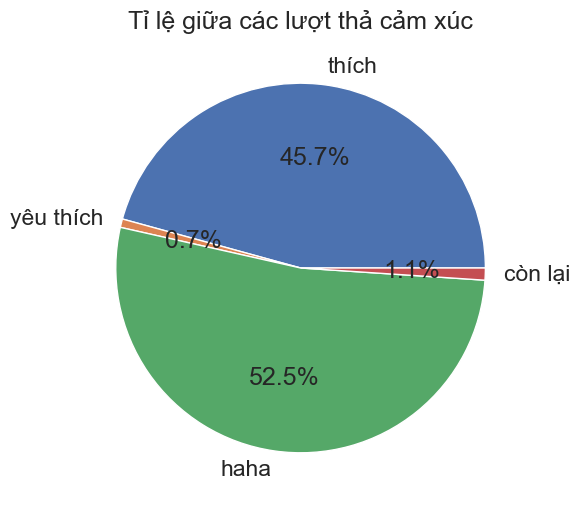

In [132]:
plt.figure(figsize=(6, 6))
plt.pie(x,
        labels = ['thích','yêu thích','haha','còn lại'], # Nhãn của các nhóm
        autopct = '%1.1f%%', # Format hiển thị giá trị %
        shadow = False)
plt.title("Tỉ lệ giữa các lượt thả cảm xúc", fontsize=18)

In [133]:
z = []
z.append(post_df_full_with_reactions['thích'].sum())
z.append(post_df_full_with_reactions['yêu thích'].sum())
z.append(post_df_full_with_reactions['haha'].sum())
z.append(post_df_full_with_reactions['wow'].sum())
z.append(post_df_full_with_reactions['buồn'].sum())
z.append(post_df_full_with_reactions['phẫn nộ'].sum())
z.append(post_df_full_with_reactions['thương thương'].sum())
z.append(post_df_full_with_reactions['shares'].sum())
z.append(post_df_full_with_reactions['comments'].sum())
z

[815768.0, 13207.0, 936198.0, 3993.0, 12758.0, 104.0, 1909.0, 10391, 36022]

In [134]:
dict_columns = {
    'type of reactions':['like', 'heart', 'haha', 'wow', 'sad', 'angry', 'care', 'shares', 'comments'],
    'values': list(z)
}
df = pd.DataFrame(dict_columns)
display(df)


type of reactions    values
0              like  815768.0
1             heart   13207.0
2              haha  936198.0
3               wow    3993.0
4               sad   12758.0
5             angry     104.0
6              care    1909.0
7            shares   10391.0
8          comments   36022.0

In [135]:
df['values'].describe()

count         9.000000
mean     203372.222222
std      382665.670986
min         104.000000
25%        3993.000000
50%       12758.000000
75%       36022.000000
max      936198.000000
Name: values, dtype: float64

<Axes: ylabel='Density'>

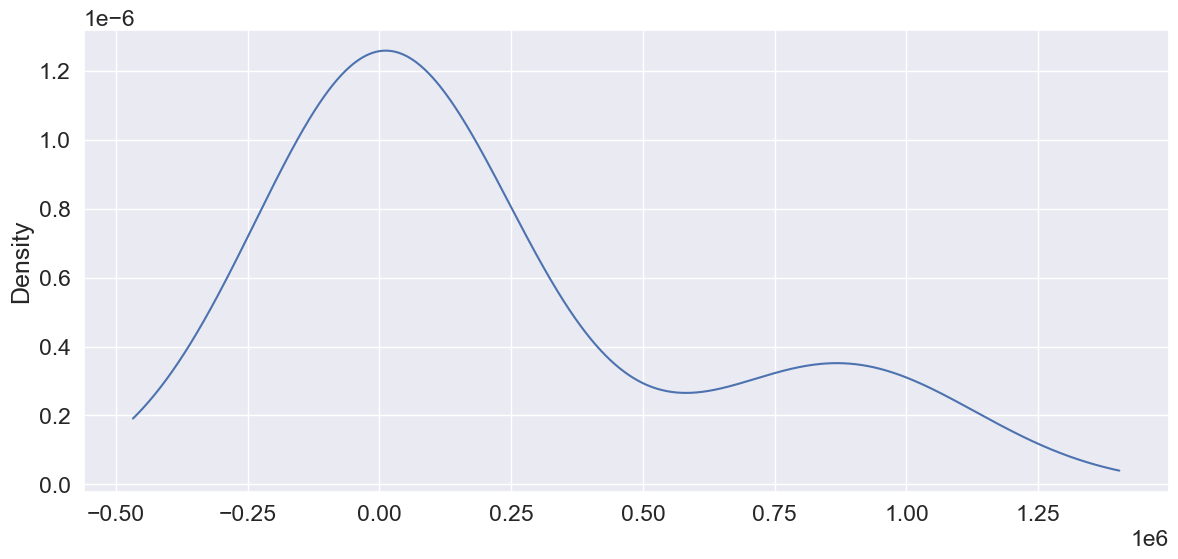

In [136]:
df['values'].plot(kind = 'density', figsize = (14,6))

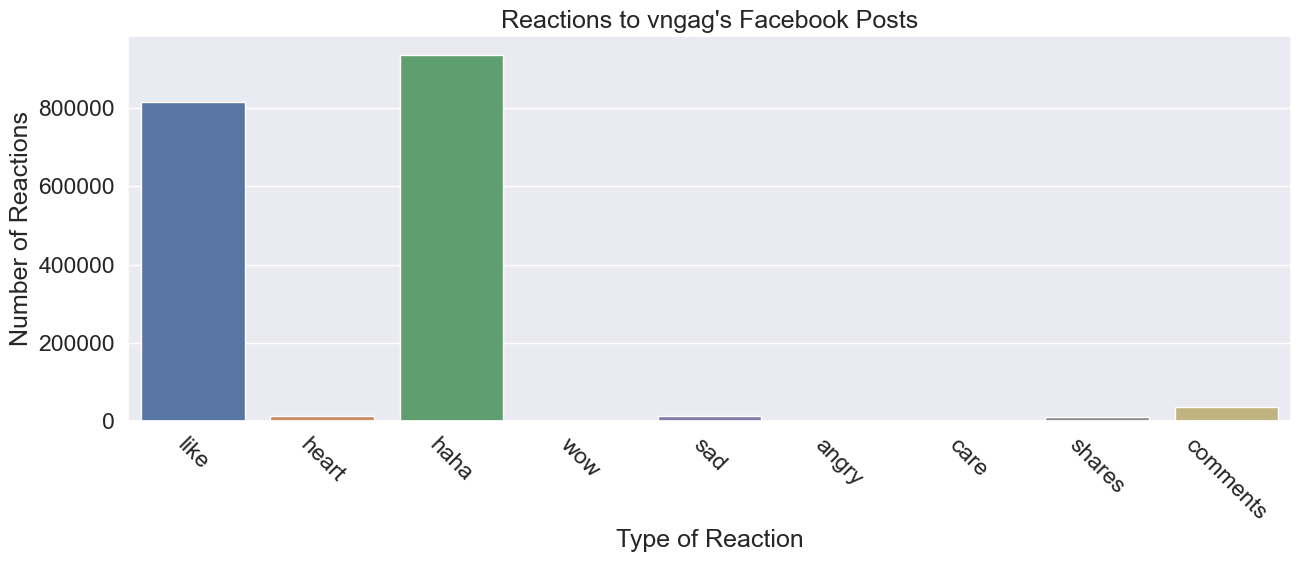

In [137]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=df['type of reactions'], y=df['values'])
ax.set_title("Reactions to vngag's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

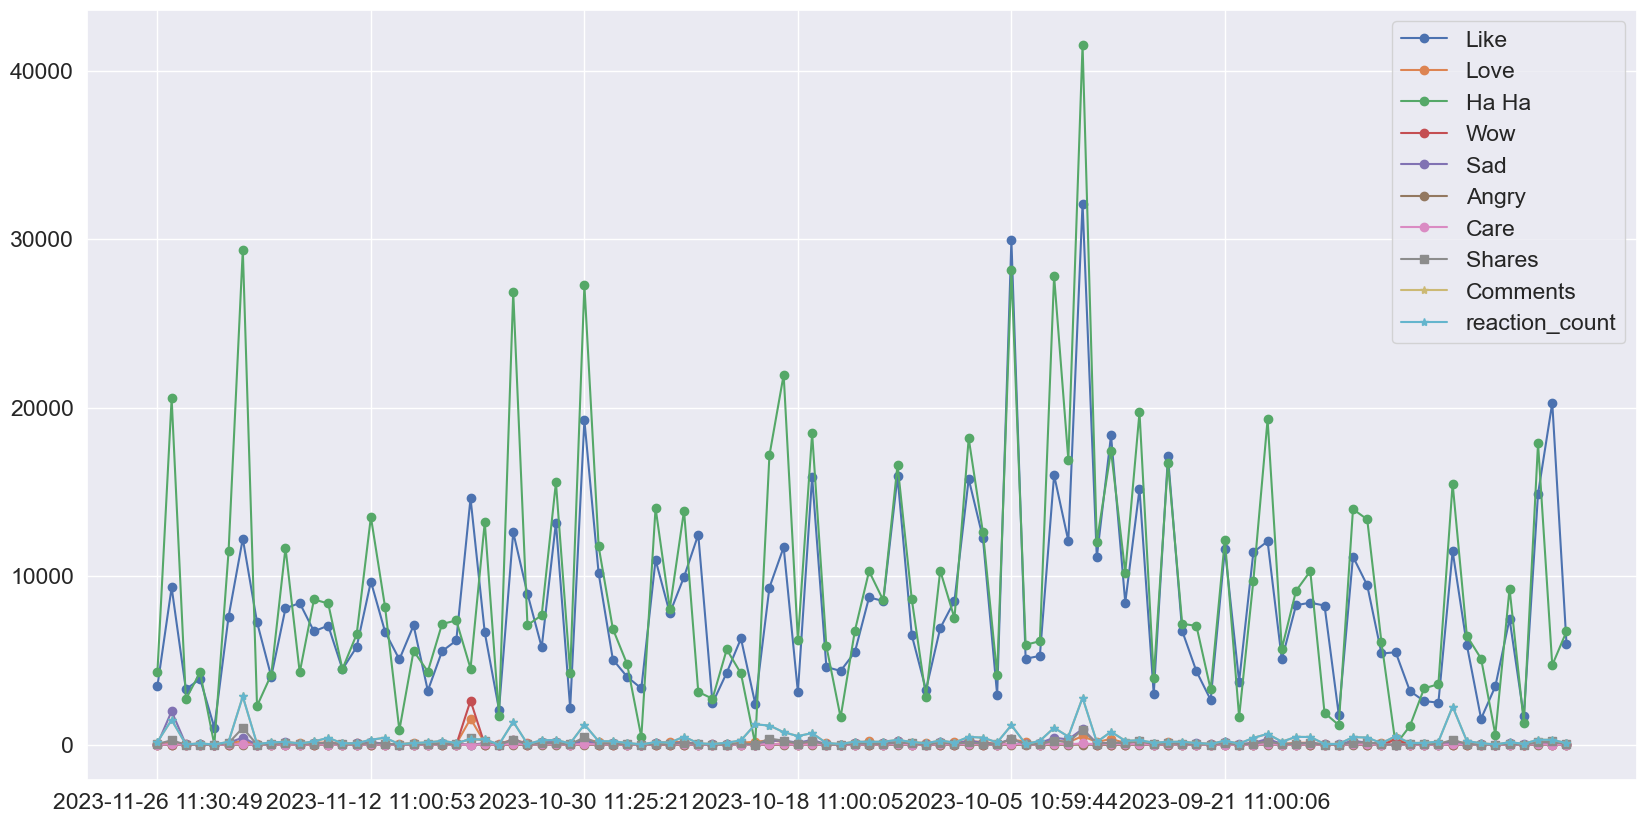

In [138]:

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thích'], label = "Like", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['yêu thích'], label = "Love", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['buồn'], label = "Sad", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['phẫn nộ'], label = "Angry", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['thương thương'], label = "Care", marker="o")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "Comments", marker="*")
ax.plot(post_df_full_with_reactions['time'], post_df_full_with_reactions['comments'], label = "reaction_count", marker="*")
ax.set_xticks(np.arange(0,15*6,15))
plt.legend()



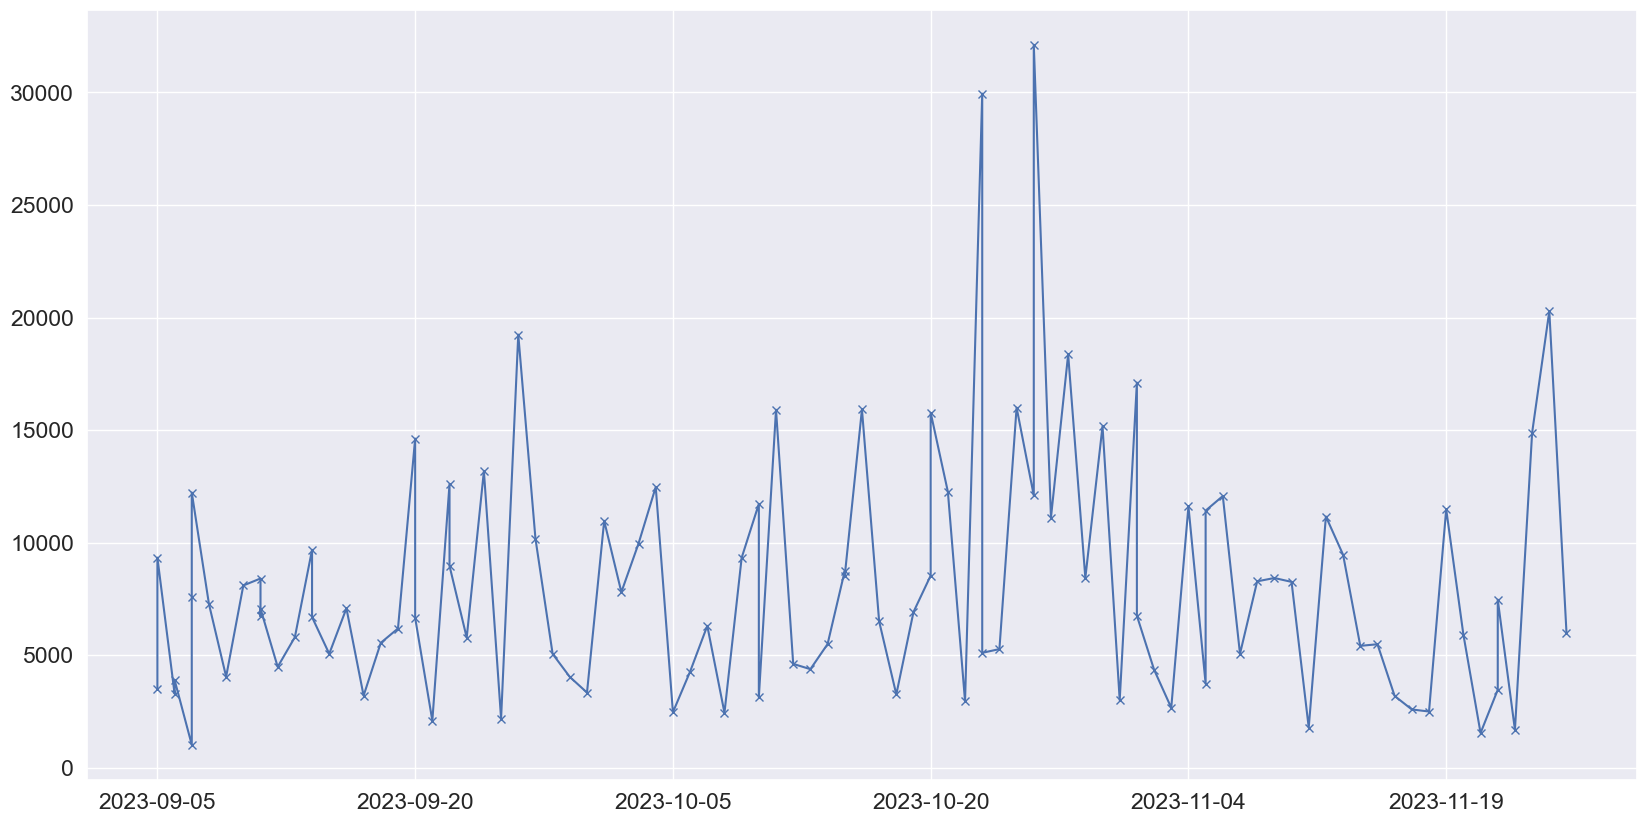

In [139]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(date_time['date'], post_df_full_with_reactions['thích'], label = "Like", marker="x")
ax.set_xticks(np.arange(0,15*6,15))

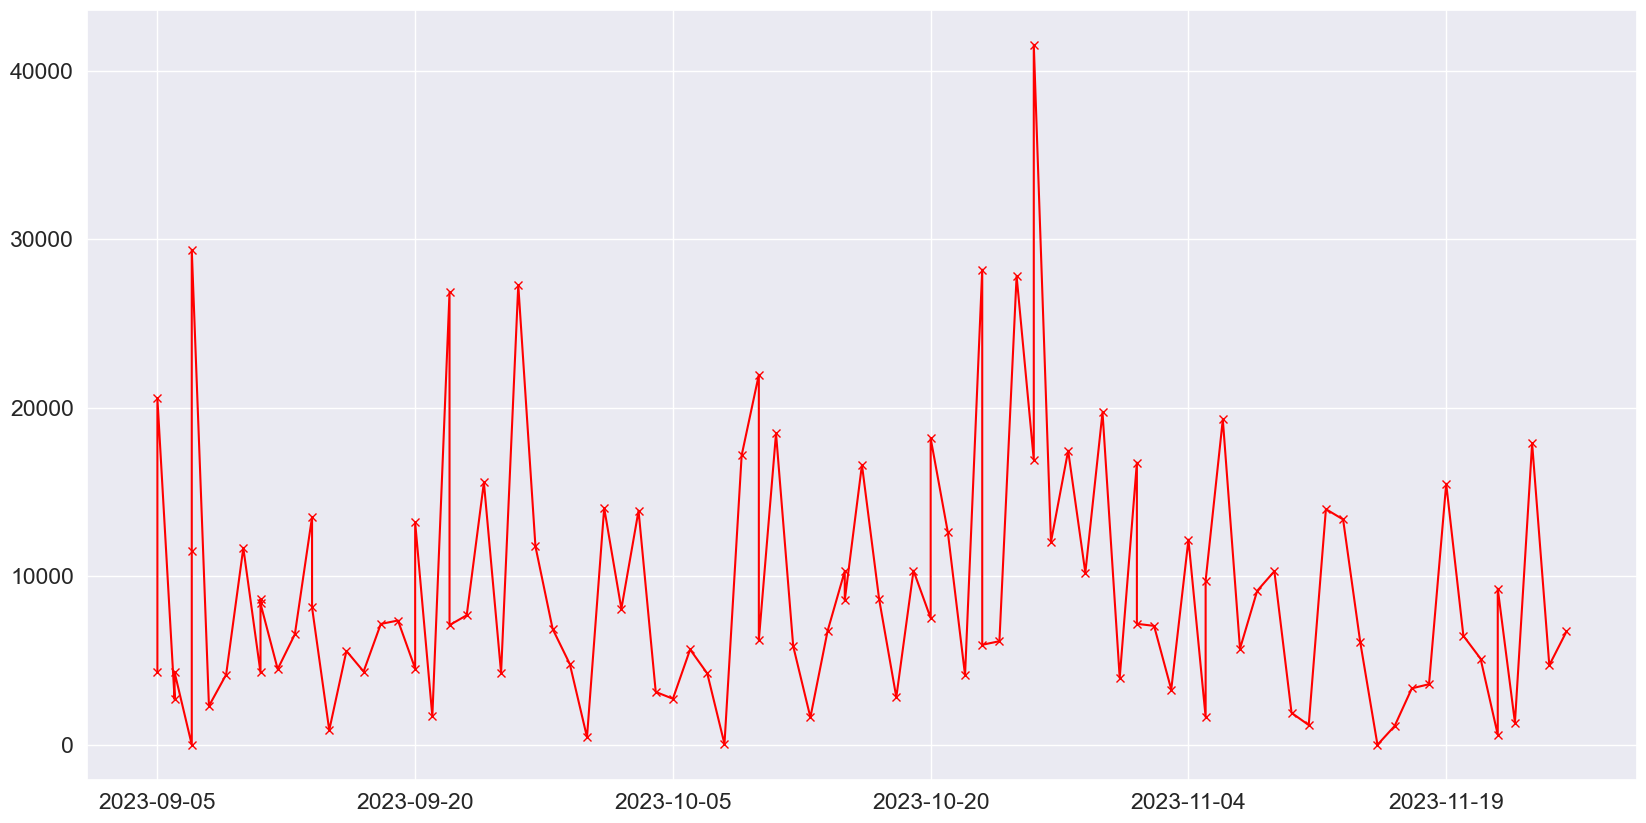

In [140]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(date_time['date'], post_df_full_with_reactions['haha'],color ='red', label = "Like", marker="x")
ax.set_xticks(np.arange(0,15*6,15))

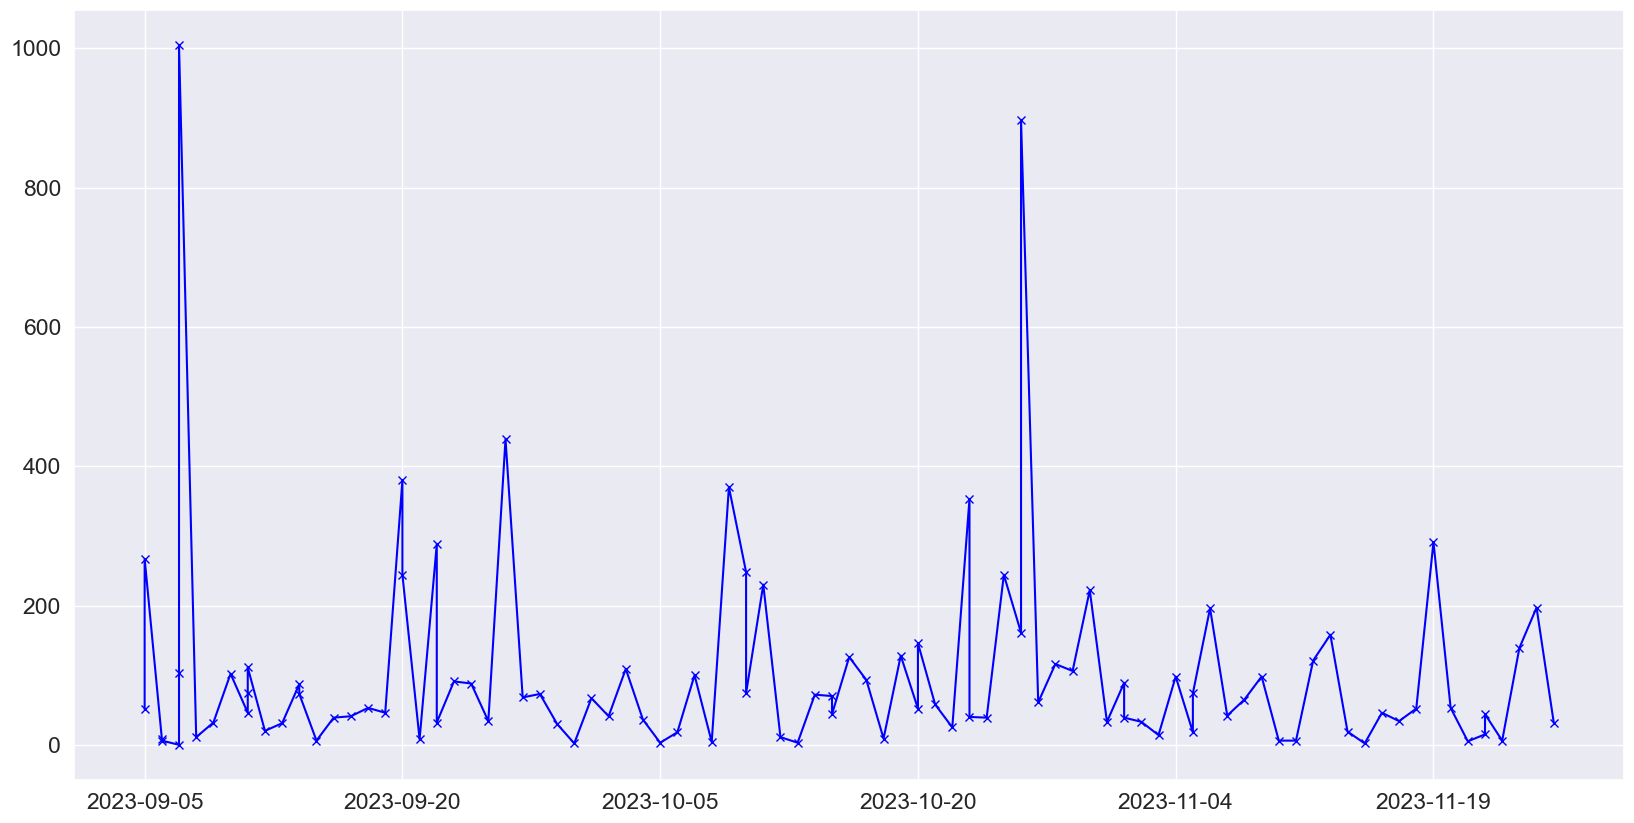

In [141]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(date_time['date'], post_df_full_with_reactions['shares'],color ='blue', label = "Like", marker="x")
ax.set_xticks(np.arange(0,15*6,15))

In [142]:
# số clip do từng người đóng
a=post_df_full_with_reactions['post_text'].tolist()
res=[]
for i in a :
  if "#VnGAGvideo" in i: res.append(i)
print(res)
print(len(res))

['Ma ni phét :)))\n#VnGAGvideo', 'Vãi nồi cái style :))))\n#VnGAGvideo', 'Boy phố lạnh lùng kiểu:\n\n#VnGAGvideo', 'Thích cái chất tổng tài 😎\n#VnGAGvideo', 'Cứ lạnh là lại bắt đầu 😏\n#VnGAGvideo', 'Tự nhiên cứ thế thôi :D\n#VnGAGvideo', 'Quy về 1 mối hết :)))\n#VnGAGvideo', 'Thế này chưa được rồi :D\n#VnGAGvideo', 'Cứ phải gọi là chiến mã cơ :)))\n#VnGAGvideo', 'Chưa chắc đã ngây thơ đâu :D\n#VnGAGvideo', 'Tình yêu thế này mùi lắm nói thật 🤧\n#VnGAGvideo', 'Người this người that :)))\n#VnGAGvideo #Tú #Hans', 'Gen Z thế này thì :)\n#VnGAGvideo', 'Ngoài kia thế giới yêu nhau kiểu zì 🥰\n#VnGAGvideo', 'Được hôm đi chơi cả nhóm :D\n#VnGAGvideo', 'Cũng chỉ là thỏa mãn bản thân thôi :D\n#VnGAGvideo', "Hóa trang Halloween dễ wa' 🤡\n#VnGAGvideo #Tú #Hans #ThuHường #LMinh", 'Chiếu chưa trải vs chiếu trải quá nhiều lần :o\n#VnGAGvideo #Tú #LMinh', 'Cứ ga lăng thế thôi :D\n#VnGAGvideo #Tú #HàTrung', 'Mấy đứa học giỏi văn kiểu:\n\n#VnGAGvideo #Lim', 'Sự thật phũ phàng :D\n#VnGAGvideo #Tú #Lim', 'C

In [143]:
# số clip do từng người đóng
a=post_df_full_with_reactions['post_text'].tolist()
res=[]
for i in a :
  if "#Hans" in i: res.append(i)
print(res)
print(len(res))

['Người this người that :)))\n#VnGAGvideo #Tú #Hans', "Hóa trang Halloween dễ wa' 🤡\n#VnGAGvideo #Tú #Hans #ThuHường #LMinh", 'Cứ như Alice ở xứ sở thần tiên :)))\n#VnGAGvideo #HươngThù #Hans', 'Tận hưởng mùa thu Hà Nội đúng cách 🥰\n#VnGAGvideo #Hans #Lim', 'Và đó là lý do chúng ta nên đi xe 4 bánh :)))\n#VnGAGvideo #Hans #LMinh', 'List nhạc cho mấy đứa buồn tình 🥺\n#VnGAGvideo #Hans #LMinh', "Đừng có cố wa' :)\n#VnGAGvideo #Hans #Tú", 'Tiếc nuối đầu đông 🥶\n#VnGAGvideo #Tú #Hans', 'Học mới được 2 cái tín chỉ qua môn mà đã bày đặt\n#VnGAGvideo #HươngThù #Hans', 'Hok hiểu nổi cái suy nghĩ luôn á :D\n#VnGAGvideo #Hans #HàTrung', 'Hok thể ngửi nổi :D\n#VnGAGvideo #Tú #Hans', "Vinh dự wa' 🥰\n#VnGAGvideo #Tú #Hans #LMinh", 'Ý là gà 🐣\n#VnGAGvideo #Hans #HàTrung', 'Thực hành luôn mà :)))\n#VnGAGvideo #Hans #HươngThù', 'Chơi bóng kiểu này hơi lạ :))))\n#VnGAGvideo #Hans #Lim #HàTrung', 'Sơ hở là chành chọe :D\n#VnGAGvideo #Tú #Hans #LMinh', 'Buổi đi chơi Trung thu bất ổn :D\n#VnGAGvideo #Tú #

In [144]:
# số clip do từng người đóng
a=post_df_full_with_reactions['post_text'].tolist()
res=[]
for i in a :
  if "#Tú" in i: res.append(i)
print(res)
print(len(res))

['Người this người that :)))\n#VnGAGvideo #Tú #Hans', "Hóa trang Halloween dễ wa' 🤡\n#VnGAGvideo #Tú #Hans #ThuHường #LMinh", 'Chiếu chưa trải vs chiếu trải quá nhiều lần :o\n#VnGAGvideo #Tú #LMinh', 'Cứ ga lăng thế thôi :D\n#VnGAGvideo #Tú #HàTrung', 'Sự thật phũ phàng :D\n#VnGAGvideo #Tú #Lim', 'Văn mẫu nhân dịp 20/10 🥰\n#VnGAGvideo #Tú #LMinh', "Đừng có cố wa' :)\n#VnGAGvideo #Hans #Tú", 'Sơ hở là nhắc đến nhau ngay :D\n#VnGAGvideo #Tú #HươngThù #HàTrung', 'Tiếc nuối đầu đông 🥶\n#VnGAGvideo #Tú #Hans', 'Khảo sát 1 vòng xem ý anh em như nào :)\n#VnGAGvideo #Tú', 'Học ăn học nói xong ló phải khác :)))\n#VnGAGvideo #Tú #Lim', 'Hok thể ngửi nổi :D\n#VnGAGvideo #Tú #Hans', 'Chỉ ăn thua là nhanh :D\n#VnGAGvideo #Tú #LMinh', "Vinh dự wa' 🥰\n#VnGAGvideo #Tú #Hans #LMinh", 'Sơ hở là chành chọe :D\n#VnGAGvideo #Tú #Hans #LMinh', 'Buổi đi chơi Trung thu bất ổn :D\n#VnGAGvideo #Tú #Hans #LMinh', 'Học ăn học nói 🤐\n#VnGAGvideo #Hans #Tú #HươngThù', 'Mệt zùm :)\n#VnGAGvideo #Tú #Hans', 'Bù trừ ch

In [145]:
# số clip do từng người đóng
a=post_df_full_with_reactions['post_text'].tolist()
res=[]
for i in a :
  if "#LMinh" in i: res.append(i)
print(res)
print(len(res))

["Hóa trang Halloween dễ wa' 🤡\n#VnGAGvideo #Tú #Hans #ThuHường #LMinh", 'Chiếu chưa trải vs chiếu trải quá nhiều lần :o\n#VnGAGvideo #Tú #LMinh', 'Và đó là lý do chúng ta nên đi xe 4 bánh :)))\n#VnGAGvideo #Hans #LMinh', 'Văn mẫu nhân dịp 20/10 🥰\n#VnGAGvideo #Tú #LMinh', 'List nhạc cho mấy đứa buồn tình 🥺\n#VnGAGvideo #Hans #LMinh', 'Chỉ ăn thua là nhanh :D\n#VnGAGvideo #Tú #LMinh', "Vinh dự wa' 🥰\n#VnGAGvideo #Tú #Hans #LMinh", 'Sơ hở là chành chọe :D\n#VnGAGvideo #Tú #Hans #LMinh', 'Buổi đi chơi Trung thu bất ổn :D\n#VnGAGvideo #Tú #Hans #LMinh', 'Buổi date thất bại :)))))\n#VnGAGvideo #Hans #LMinh', 'Sơ hở là bị lật kèo :))))\n#VnGAGvideo #Tú #LMinh', 'Hiểu ý hộ cái đê :D\n#VnGAGvideo #Tú #LMinh', 'Đáng mặt đàn ông 😎\n#VnGAGvideo #Tú #LMinh', 'Hỏi phát biết ngoại tình luôn :D\n#VnGAGvideo #Tú #LMinh', 'Tình đơn phương 😥\n#VnGAGvideo #Tú #LMinh', 'Mấy bạn nam mỗi khi chịp ảnh cho người yêu kiểu :)\n#VnGAGvideo #Tú #LMinh', 'Đùa k vui tý lào 😣\n#VnGAGvideo #Tú #LMinh', 'Sơ hở cái là

In [146]:
post_df_full_with_reactions['post_text']
text = "" 
for i in post_df_full_with_reactions['post_text']:
  text=text+i+"\n"
print(text)

Ma ni phét :)))
#VnGAGvideo
Vãi nồi cái style :))))
#VnGAGvideo
Cứ như ngoài quán net 🙂
#CLBSROVTC #ConDuongToLua #SilkroadOriginVTC
1 người lên công ty ngủ còn những người khác ở nhà vẫn ngủ nên nay k có clip rồi anh em 😴

#VnGAG
Cuộc gọi của shipper Mua sắm VnShop urgent hơn bn cái task :v

Mà dạo này Mua sắm VnShop có linh vật Flash-V mới ra đáng yêu xỉu, ẻm matcos thương hiệu này của Mua sắm VnShop được lấy cảm hứng từ nút tính năngXem thêm vuông vắn trên ứng dụng, cũng là những gói hàng được bọc cẩn thận trao tới tận tay khách hàng. Flash-V giống như người trợ lý ảo, hỗ trợ khách hàng mọi lúc, mọi nơi.

Flash-V với đôi giày tia chớp, đại diện cho tính cách nhanh nhẹn - năng động sẽ mang đến cho khách hàng trải nghiệm mua hàng tiện lợi và với tốc độ giao hàng thần tốc.

Mê quá toàn phải lên app Ví VNPAY và các ứng dụng ngân hàng ngắm ẻm thôi rồi lại chốt đơn loạt đồ chính hãng, giá siêu rẻ =)))
Boy phố lạnh lùng kiểu:

#VnGAGvideo
Thích cái chất tổng tài 😎
#VnGAGvideo
Lâu lâu làm t

## Read all posts

In [147]:
df_text = raw_df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

post_id                                          post_text
0   739790934853318                       Ma ni phét :)))\n#VnGAGvideo
1   738959674936444               Vãi nồi cái style :))))\n#VnGAGvideo
2   738655521633526  Cứ như ngoài quán net 🙂\n#CLBSROVTC #ConDuongT...
3   738116678354077  1 người lên công ty ngủ còn những người khác ở...
4   737776435054768  Cuộc gọi của shipper Mua sắm VnShop urgent hơn...
..              ...                                                ...
95  692661239566288         Đùa k vui tý lào 😣\n#VnGAGvideo #Tú #LMinh
96  692263506272728  Công ty vào năm bao nhiêu đó trước Công nguyên...
97  692092739623138  Sơ hở cái là mang tiếng :D\n#VnGAGvideo #Tú #L...
98  691700479662364          Khoảng cách thế hệ ló thế :)\n#VnGAGvideo
99  691526953013050    Ảo tưởng bản thân :)))\n#VnGAGvideo #LMinh #Lim

[100 rows x 2 columns]

In [148]:
df_text.sort_values(by = 'post_text', ascending = True)

post_id                                          post_text
86  695559295943149  1 cung trăng hok thể có 2 chị Hằng :D\n\n#Audi...
3   738116678354077  1 người lên công ty ngủ còn những người khác ở...
85  696144695884609  2 đứa ghéc nhau làm cùng chỗ kiểu :D\n#VnGAGvi...
27  725758799589865  Anh eim VnGAG cosplay nỗi sợ của người đi đườn...
5   737579255074486             Boy phố lạnh lùng kiểu:\n\n#VnGAGvideo
..              ...                                                ...
25  726769746155437           Được hôm đi chơi cả nhóm :D\n#VnGAGvideo
87  695159879316424  ĐỜI BẾ TẮC VÌ HỘI BẠN “CẨM CHƯỚNG”, GHÉ NGAY C...
49  715303500635395           Đừng có cố wa' :)\n#VnGAGvideo #Hans #Tú
72  702046898627722  Đừng để ngta nghĩ mình cần ngta quá :)\n#VnGAG...
99  691526953013050    Ảo tưởng bản thân :)))\n#VnGAGvideo #LMinh #Lim

[100 rows x 2 columns]

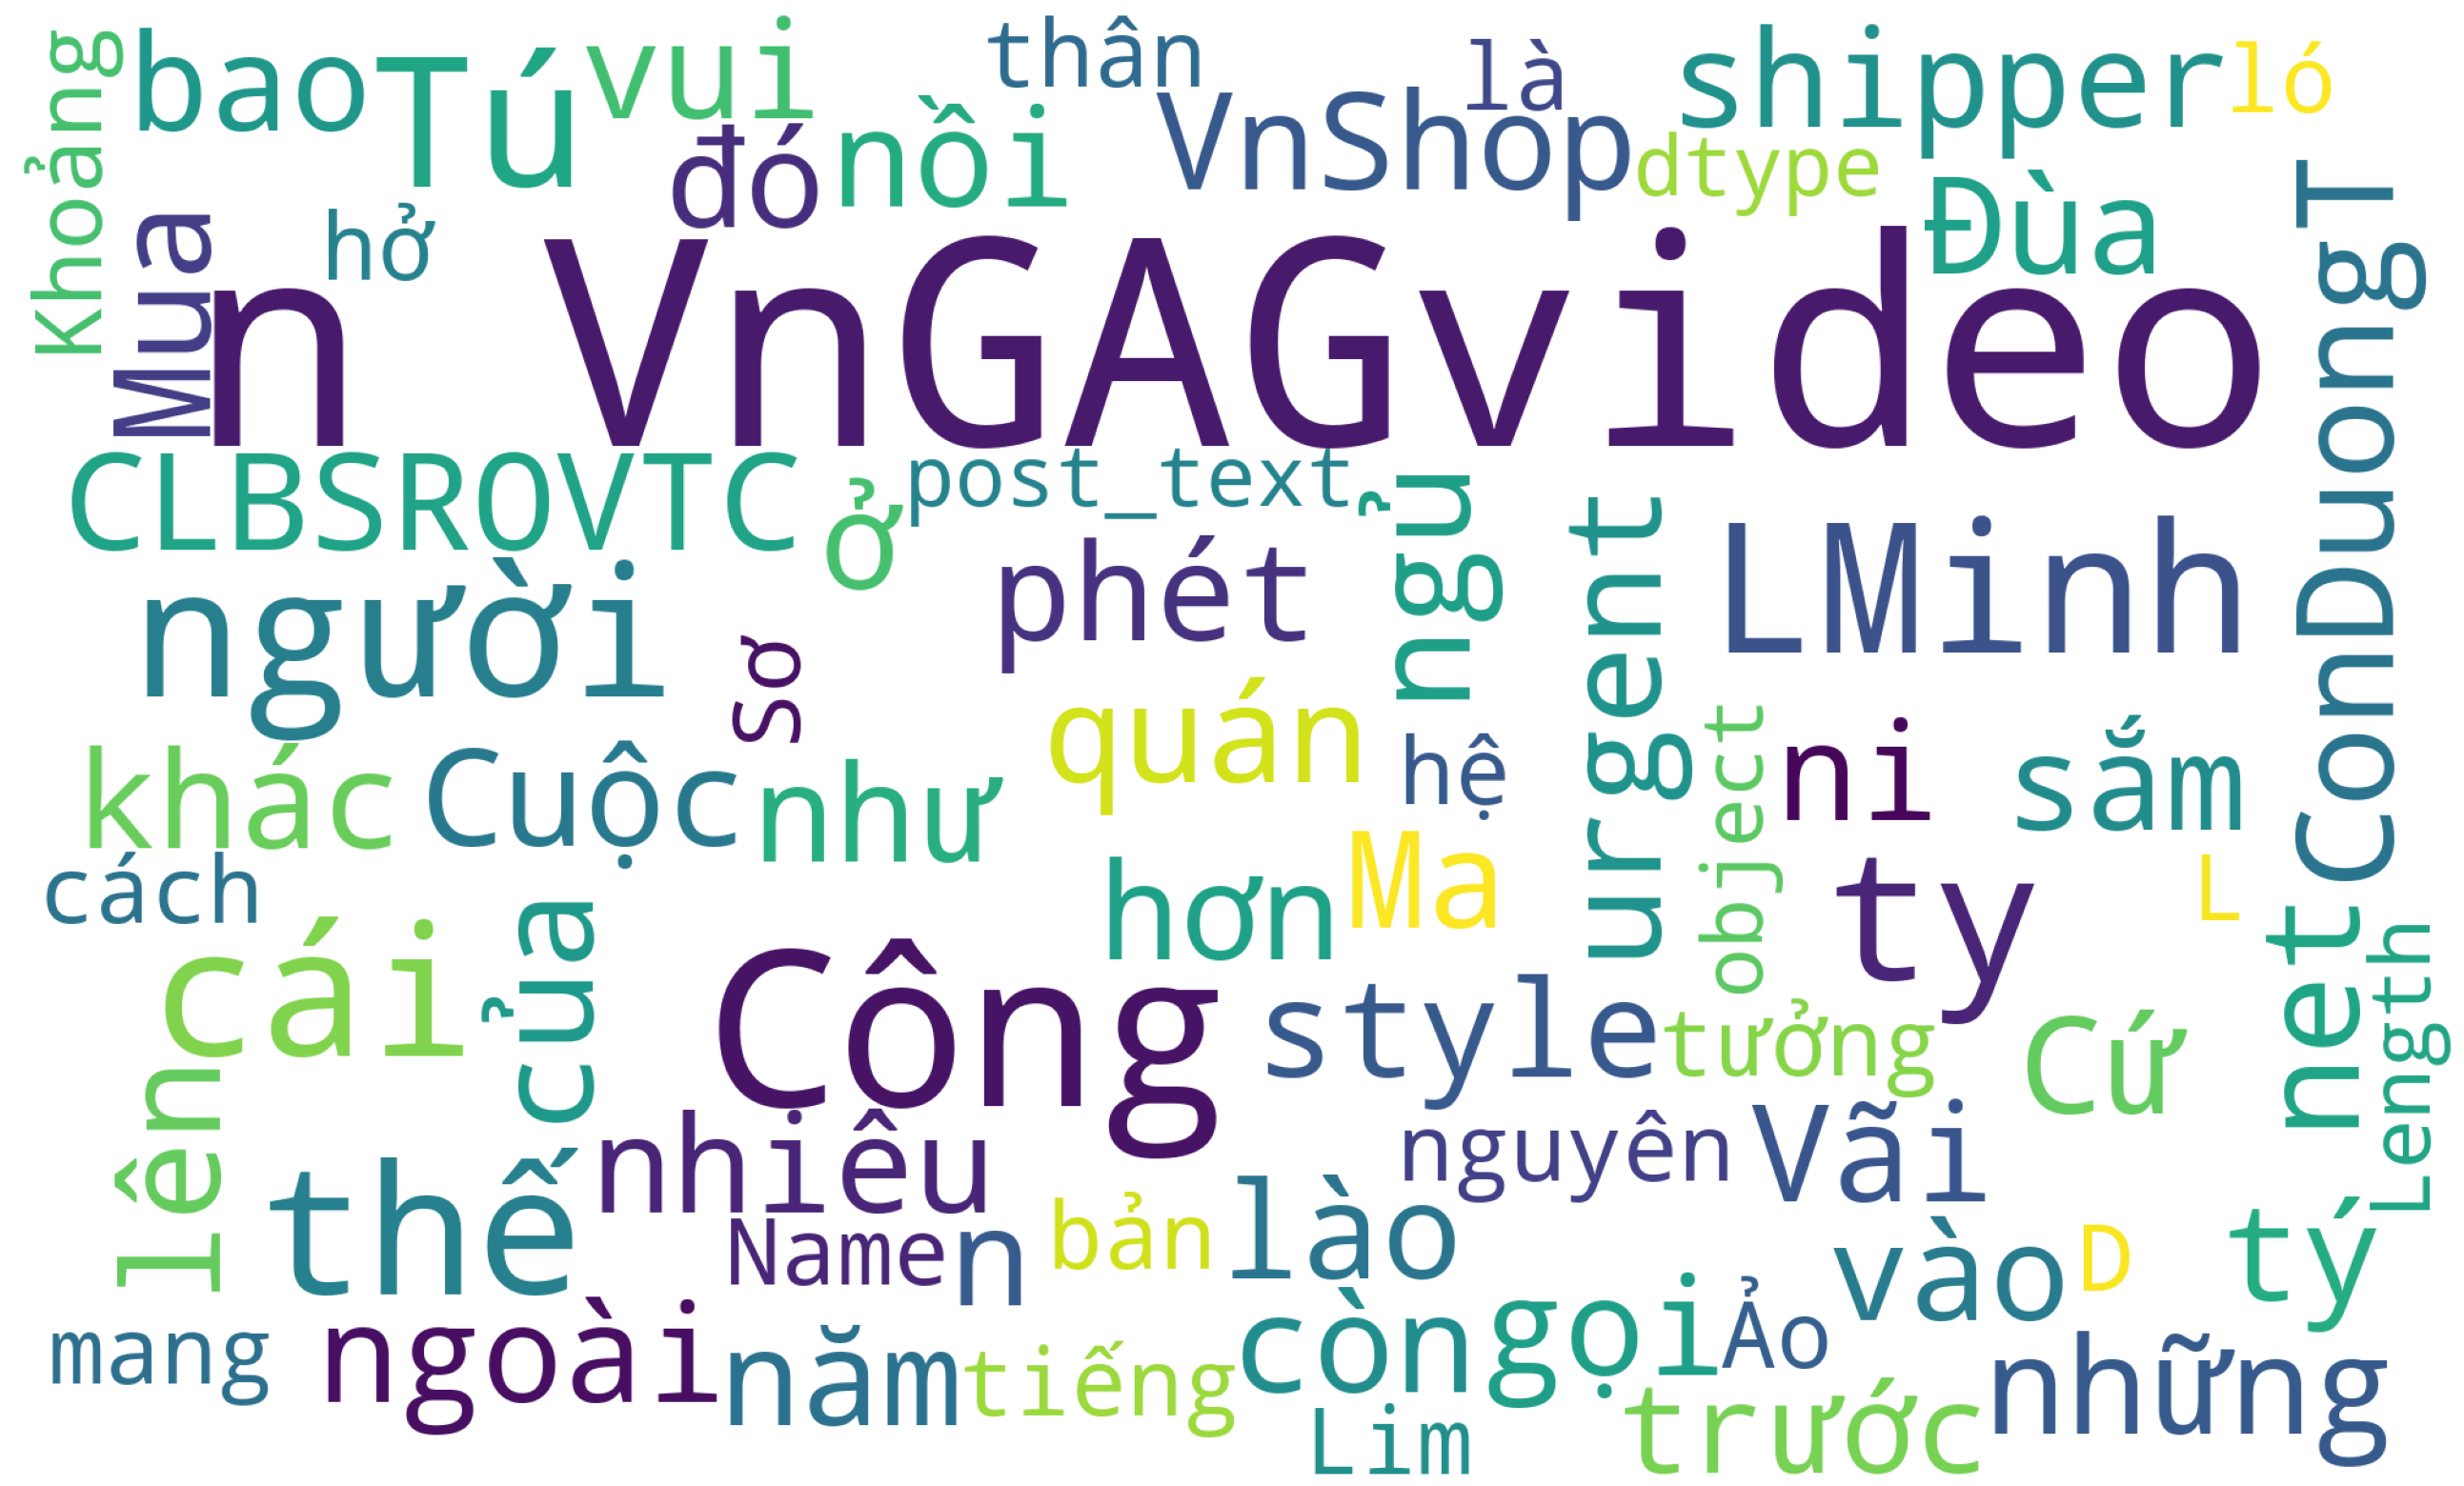

In [149]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [150]:
post_list = np.load('../final-project-lamtaynha1234/vngag/vngag.vn.npy',allow_pickle=True)

In [151]:
res=[]
for post in post_list:
    if len(post['comments_full']) > 0:
      print(post['comments_full'])
      cmt = '\n'.join([comment['comment_text'] for comment in post['comments_full'] ])
      res.append(cmt)
print(len(res))
print(res)

[{'comment_id': '1618095495265492', 'comment_url': 'https://facebook.com/1618095495265492', 'commenter_id': '100014032899136', 'commenter_url': 'https://facebook.com/huyyhoangf?eav=AfYMq9UUc97lTtTfuSoma3z_fV9q3kJm4MIW97Ty-yqaqLZi7gR45Mf-kWsWC9yncR8&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'Huy Hoang', 'commenter_meta': None, 'comment_text': 'Lim xinh vchuongggg', 'comment_time': datetime.datetime(2023, 11, 22, 0, 0), 'comment_image': 'https://scontent.fhan14-4.fna.fbcdn.net/v/t39.30808-6/405213632_1735342713610142_6288084803273129735_n.jpg?stp=cp0_dst-jpg_e15_q65_s180x540&_nc_cat=109&ccb=1-7&_nc_sid=5f2048&efg=eyJpIjoidCJ9&_nc_ohc=G71jCoXoe0MAX9zlvbI&_nc_ht=scontent.fhan14-4.fna&oh=00_AfBAw-O49tnjx7nRDB9FSW5fRQ5b5nE2kbACtrIRubuxUg&oe=65684602', 'comment_reactors': [], 'comment_reactions': None, 'comment_reaction_count': None, 'replies': [{'comment_id': '865293041724207', 'comment_url': 'https://facebook.com/865293041724207', 'commenter_id': '100087232672032', 'comment

In [152]:
import numpy as np
import pandas as pd
from facebook_scraper import get_profile

In [153]:
post_list = np.load('../final-project-lamtaynha1234/vngag/vngag.vn.npy', allow_pickle=True)
post_list = post_list.tolist()
# Lấy đường dẫn của người comment(người theo dõi bài viết)
commenter_id = []
for post in post_list:
    if len(post['comments_full'])>0:
        for url in post['comments_full']:
            s = url['commenter_id']
            # print(s)
            commenter_id.append(s)
id = []
for x in commenter_id:
    if x not in id:
        id.append(x)

In [154]:
# id2 = []
# check=False
# for ids in id:
    # if check:
        # id2.append(ids)
    # if ids == '100085888793283':
        # check = True

In [165]:
COOKIE_PATH = "/Users/kaiser/Downloads/www.facebook.com_cookies (1).txt"
FOLDER_PATH = "../final-project-lamtaynha1234/vngag/"

In [163]:

profile_list = []
for i in range(len(id)):
    try:
        profile = get_profile(str(id[i]))
        print(profile)
        profile_list.append(profile)
    except Exception :
    
        continue

{'Friend_count': None, 'Follower_count': None, 'Following_count': None, 'cover_photo': 'https://scontent.fhan2-3.fna.fbcdn.net/v/t39.30808-6/325578650_5822439594517429_7404778601399343779_n.jpg?stp=cp0_dst-jpg_e15_fr_q65&_nc_cat=100&ccb=1-7&_nc_sid=ff2d77&_nc_ohc=EpiqtHGZAXUAX_5i5I5&_nc_ht=scontent.fhan2-3.fna&oh=00_AfAFmDn1r9upn2DJKVtW3rt4f6A45eUHD5szJtJ2-xVlTg&oe=65734DA1', 'profile_picture': 'https://scontent.fhan2-3.fna.fbcdn.net/v/t39.30808-1/362260546_1666950093782738_6853892075285116841_n.jpg?stp=cp0_dst-jpg_e15_p120x120_q65&_nc_cat=104&ccb=1-7&_nc_sid=4da83f&_nc_ohc=arKyVX07C28AX8YIinU&_nc_ht=scontent.fhan2-3.fna&oh=00_AfBKGP7bMTZKkcoS9FC-Se9EwJi60rH2n3qvzMt1CTserA&oe=657320E0', 'id': '100014032899136', 'Name': 'Huy Hoang', 'Học vấn': 'Học viện Nông nghiệp Việt Nam\nCao đẳng/Đại học\nTrường THPT Sơn Tây - Nơi chắp cánh ước mơ\nTrường trung học', 'Nơi từng sống': 'Sơn Tây (thị xã)\nTỉnh/Thành phố hiện tại\nSơn Tây (thị xã)\nQuê quán'}
{'Friend_count': None, 'Follower_count': Non

In [166]:
# Khởi tạo DataFrame
data = pd.DataFrame(columns=profile_list[4].keys(), index=range(len(profile_list)), data=profile_list)

FILE_NAME = FOLDER_PATH + 'Data_Profile4'
# Chuyển dữ liệu sang file csv, xlsx,... để dẽ thao tác với dữ liệu
path1=FILE_NAME + ".csv"
data.to_csv(path1, index=False)
print(path1)

../final-project-lamtaynha1234/vngag/Data_Profile4.csv


In [167]:
data = pd.read_csv('../final-project-lamtaynha1234/vngag/Data_Profile4.csv')
data

Friend_count  Follower_count  Following_count  \
0             NaN             NaN              NaN   
1             NaN             NaN              NaN   
2             NaN             NaN              NaN   
3             NaN             NaN              NaN   
4             NaN             NaN              NaN   
..            ...             ...              ...   
428           NaN             NaN              NaN   
429           NaN             NaN              NaN   
430           NaN             NaN              NaN   
431           NaN             NaN              NaN   
432           NaN             NaN              NaN   

                                           cover_photo  \
0    https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...   
1    https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...   
2                                                  NaN   
3                                                  NaN   
4    https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...   
..                                                 ...   
428                                                NaN   
429  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
430  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   
431  https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...   
432                                                NaN   

                                       profile_picture               id  \
0    https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...  100014032899136   
1    https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...  100047723066006   
2    https://scontent.fhan2-3.fna.fbcdn.net/v/t1.30...  100068190041749   
3    https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...  100088890349862   
4    https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...  100003741380563   
..                                                 ...              ...   
428  https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...  100026438652079   
429  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...  100034442057174   
430  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...  100000124775735   
431  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...  100042153331365   
432  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...  100023734758408   

                Name                                          Công việc  \
0          Huy Hoang                                                NaN   
1           Thuý Nga                                                NaN   
2           Bún Bông  Tập đoàn tội ác Doofenshmirtz\n23 tháng 7, 202...   
3    Huynh Trong Cau                                                NaN   
4    Phạm Thạch Thảo  THPT Trần Nguyên Hãn - Hải Phòng\nhọc sinh\nTh...   
..               ...                                                ...   
428     Nguyệt Annhh                                                NaN   
429          Linh Nè          MangaToon_VI\n9 tháng 10, 2021 - Hiện tại   
430   Ly Phương Trần  SK-II\nBeauty Consultant\nŌsaka\nHà Nội\nnguồn...   
431      Vũ Đình Thọ                                                NaN   
432      Thảo Nguyên                                                NaN   

                                               Học vấn  \
0    Học viện Nông nghiệp Việt Nam\nCao đẳng/Đại họ...   
1    Đại Học Công Nghiệp Hà Nội (HaUI)\nFashion des...   
2                                                  NaN   
3    Võ Văn Kiệt High School\nCao đẳng/Đại học\nTốt...   
4    Trường Đại học Hàng hải Việt Nam\nCao đẳng/Đại...   
..                                                 ...   
428  Học viện Hành chính Quốc gia - National Academ...   
429                                                NaN   
430  Thang Long\nTrường trung học\nTốt nghiệp năm 2...   
431            THPT Nguyễn Tất Thành\nTrường trung học   
432                                                NaN   

                                         Nơi từng sống  
0    Sơn Tây (thị xã)\nTỉnh/Thành phố hiện tại\nSơn...  
1    Vũng Tàu\nTỉnh/Thành phố hiện tại\nNam Đị

In [168]:
data.isnull().sum()

Friend_count       433
Follower_count     433
Following_count    433
cover_photo        131
profile_picture      0
id                   0
Name                 0
Công việc          303
Học vấn            231
Nơi từng sống      103
dtype: int64

In [169]:
data['Nơi từng sống']

0      Sơn Tây (thị xã)\nTỉnh/Thành phố hiện tại\nSơn...
1      Vũng Tàu\nTỉnh/Thành phố hiện tại\nNam Định\nQ...
2                                                    NaN
3                                                    NaN
4      Hải Phòng\nTỉnh/Thành phố hiện tại\nHải Phòng\...
                             ...                        
428                    Bắc Ninh\nTỉnh/Thành phố hiện tại
429    Nha Trang\nTỉnh/Thành phố hiện tại\nNha Trang\...
430    Hà Nội\nTỉnh/Thành phố hiện tại\nHà Nội\nQuê quán
431    Hải Phòng\nTỉnh/Thành phố hiện tại\nUông Bí\nQ...
432                                                  NaN
Name: Nơi từng sống, Length: 433, dtype: object

In [190]:
x = data.loc[data['Name'] == 'Minh Lâm Nguyễn Duy']
x

Friend_count  Follower_count  Following_count  \
165           NaN             NaN              NaN   

                                           cover_photo  \
165  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...   

                                       profile_picture               id  \
165  https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...  100031001453549   

                    Name Công việc  \
165  Minh Lâm Nguyễn Duy       NaN   

                                               Học vấn  \
165  Trường Đại học Công nghệ - Đại học Quốc gia Hà...   

                                         Nơi từng sống  
165  Hà Nội\nTỉnh/Thành phố hiện tại\nThái Bình\nQu...

In [181]:
temps = {}
tinh = ['An Giang','Bà Rịa - Vũng Tàu','Bạc Liêu','Bắc Giang','Bắc Kạn','Bắc Ninh',
        'Bến Tre','Bình Dương','Bình Định','Bình Phước','Bình Thuận','Cà Mau','Cao Bằng',
        'Cần Thơ','Đà Nẵng','Đắk Lắk','Đắk Nông','Điện Biên','Đồng Nai','Đồng Tháp',
        'Gia Lai','Hà Giang','Hà Nam','Hà Nội','Hà Tĩnh','Hải Dương','Hải Phòng',
        'Hậu Giang','Hòa Bình','Thành phố Hồ Chí Minh','Hưng Yên','Khánh Hòa','Kiên Giang',
        'Kon Tum','Lai Châu','Lạng Sơn','Lào Cai','Lâm Đồng','Long An','Nam Định',
        'Nghệ An','Ninh Bình','Ninh Thuận','Phú Thọ','Phú Yên','Quảng Bình','Quảng Nam',
        'Quảng Ngãi','Quảng Ninh','Quảng Trị','Sóc Trăng','Sơn La','Tây Ninh','Thái Bình',
        'Thái Nguyên','Thanh Hóa','Thừa Thiên Huế','Tiền Giang','Trà Vinh','Tuyên Quang',
        'Vĩnh Long','Vĩnh Phúc','Yên Bái']
word = ''
for i in tinh:
    if i not in temps:
        temps[i]=0
for i in data['Nơi từng sống']:
    for j in tinh:
        if j in str(i):
            temps[j]+=1
            word=word+j+' '
Dia_chi = []
Dia_chi.append(temps)
Dia_chi = pd.DataFrame(Dia_chi)
Dia_chi

An Giang  Bà Rịa - Vũng Tàu  Bạc Liêu  Bắc Giang  Bắc Kạn  Bắc Ninh  \
0         1                  0         2          9        3         8   

   Bến Tre  Bình Dương  Bình Định  Bình Phước  ...  Thái Bình  Thái Nguyên  \
0        1           0          0           0  ...         15            4   

   Thanh Hóa  Thừa Thiên Huế  Tiền Giang  Trà Vinh  Tuyên Quang  Vĩnh Long  \
0          3               0           2         0            8          0   

   Vĩnh Phúc  Yên Bái  
0          2        3  

[1 rows x 63 columns]

In [196]:
a = Dia_chi.loc[0].index[::]
b = a[::-1]
x = Dia_chi.loc[:,b]
x = x.loc[0]
x

Yên Bái              3
Vĩnh Phúc            2
Vĩnh Long            0
Tuyên Quang          8
Trà Vinh             0
                    ..
Bắc Kạn              3
Bắc Giang            9
Bạc Liêu             2
Bà Rịa - Vũng Tàu    0
An Giang             1
Name: 0, Length: 63, dtype: int64

In [193]:
x.sort_values(ascending = False).head(5)


Hà Nội                   134
Thành phố Hồ Chí Minh     36
Hải Phòng                 23
Nam Định                  19
Thái Bình                 15
Name: 0, dtype: int64

<Axes: >

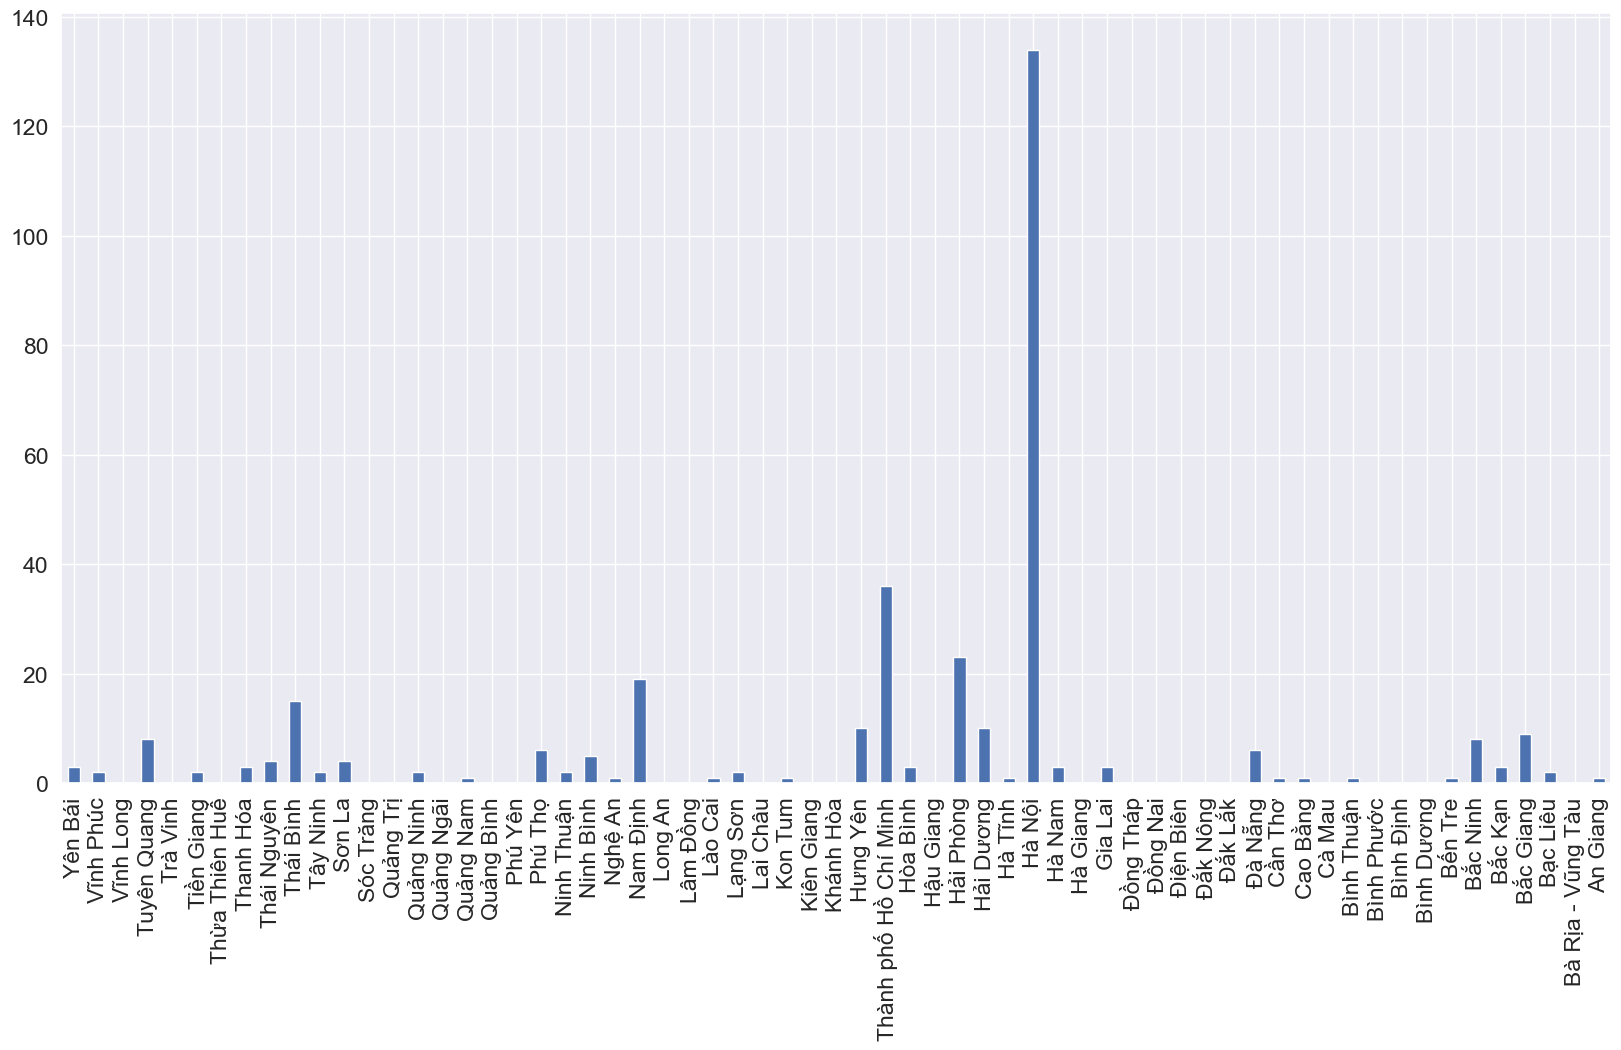

In [195]:
x.plot(kind = 'bar' , figsize=(20,10))

In [223]:
bac = ['Lào Cai', 'Yên Bái', 'Điện Biên', 'Hòa Bình', 'Lai Châu', 'Sơn La','Hà Giang', 'Cao Bằng', 'Bắc Kạn', 'Lạng Sơn', 'Tuyên Quang', 'Thái Nguyên', 'Phú Thọ', 'Bắc Giang', 'Quảng Ninh', 'Bắc Ninh', 'Hà Nam', 'Hà Nội', 'Hải Dương', 'Hưng Yên', 'Hải Phòng', 'Nam Định', 'Ninh Bình', 'Thái Bình', 'Vĩnh Phúc']
trung = ['Thanh Hoá', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị', 'Thừa Thiên-Huế', 'Kon Tum', 'Gia Lai', 'Đắc Lắc', 'Đắc Nông', 'Lâm Đồng', 'Đà Nẵng', 'Quảng Nam', 'Quảng Ngãi', 'Bình Định', 'Phú Yên', 'Khánh Hoà', 'Ninh Thuận', 'Bình Thuận']
nam = ['Bình Phước', 'Bình Dương', 'Đồng Nai', 'Tây Ninh', 'Bà Rịa Vũng Tàu', 'Long An', 'Đồng Tháp', 'Tiền Giang', 'An Giang', 'Bến Tre', 'Vĩnh Long', 'Trà Vinh', 'Hậu Giang', 'Kiên Giang', 'Sóc Trăng', 'Bạc Liêu', 'Cà Mau']
Mien = {}
a=['Miền Bắc','Miền Trung','Miền Nam']
for i in a:
    if i not in bac:
        Mien[i]=0
for i in data['Nơi từng sống']:
    for j in bac:
        if j in str(i):
            Mien['Miền Bắc']+=1
    for k in trung:
        if k in str(i):
            Mien['Miền Trung']+=1
    for q in nam:
        if q in str(i):
            Mien['Miền Nam']+=1
Mienx = []
Mienx.append(Mien)
Mienx = pd.DataFrame(Mienx)

In [224]:
Mienx

Miền Bắc  Miền Trung  Miền Nam
0       275          17         8

<Axes: >

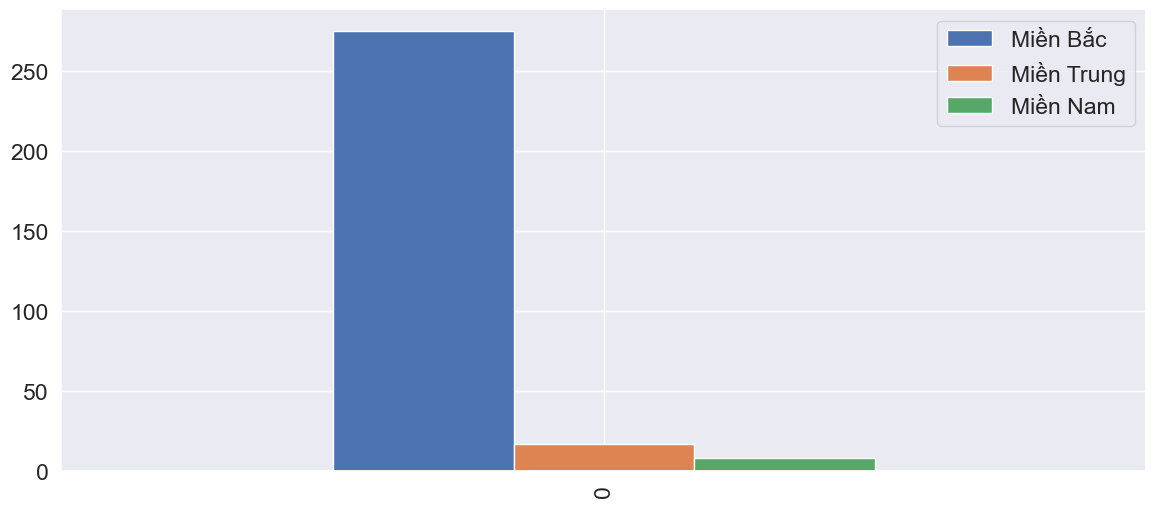

In [230]:
Mienx.plot(kind ='bar',figsize = (14,6))

Text(0.5, 1.0, 'Tỉ lệ giữa các lượt thả cảm xúc')

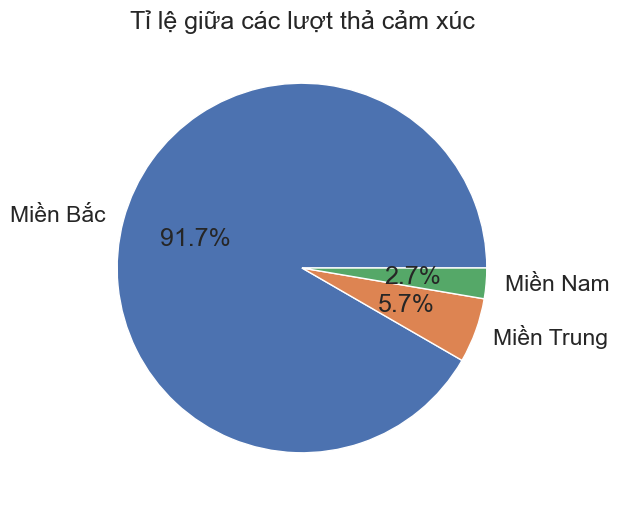

In [231]:
plt.figure(figsize=(6, 6))
plt.pie(Mienx.loc[0],
        labels = ['Miền Bắc','Miền Trung','Miền Nam'], # Nhãn của các nhóm
        autopct = '%1.1f%%', # Format hiển thị giá trị %
        shadow = False)
plt.title("Tỉ lệ giữa các lượt thả cảm xúc", fontsize=18)